In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 1.22541394 #1.22541335 #1.22540771

In [9]:
np.round(1.22541335 + ((1+1.22541335)*0.08/3e+5), 8)

1.22541394

# CIV

## CIV 1548

In [10]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [11]:
civ_1548_hires.grab_ion_transition_info()

In [12]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [13]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,50], degree=1)

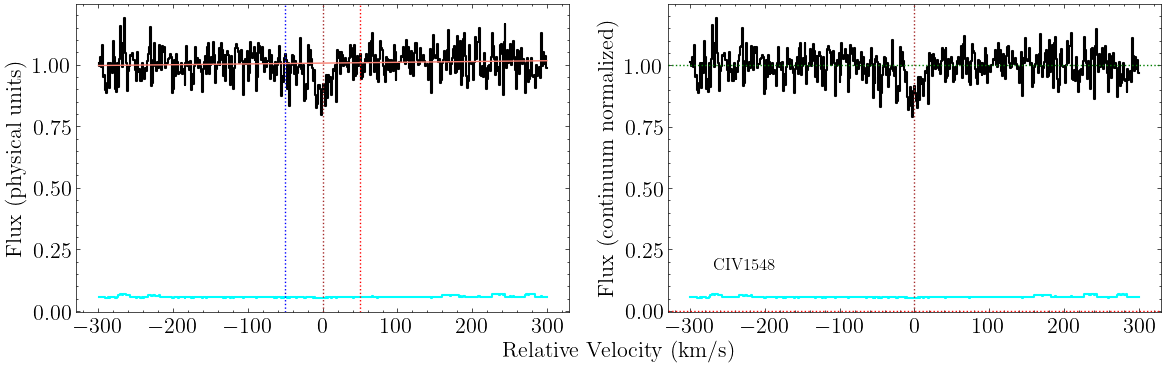

In [14]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

In [16]:
#civ_1548_nuv.get_EW_total(-50,50)

In [17]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [18]:
civ_1548_hires.init_ion_transition(init_values = np.array([[12.69, 16, 0]]), 
                             lsf_convolve = True)

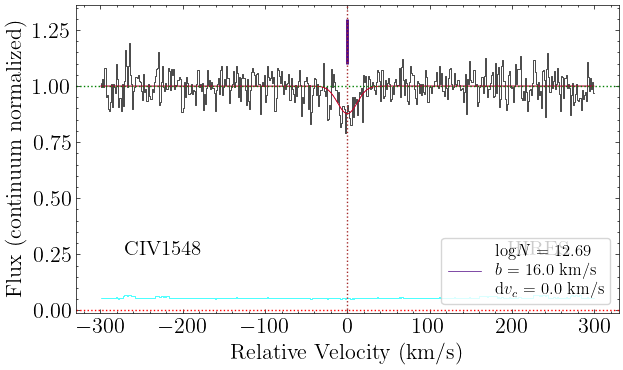

In [19]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [20]:
civ_1548_hires.fit_ion_transition()

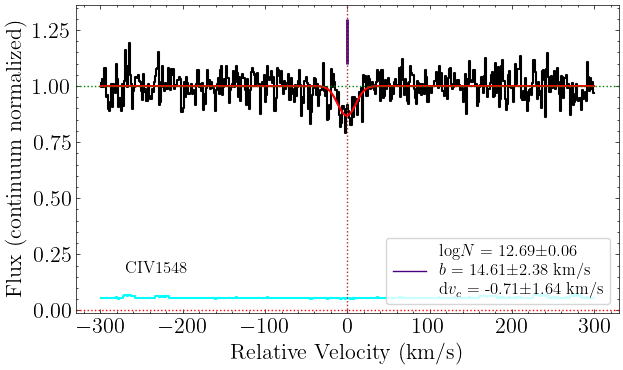

In [21]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

## CIV 1550

In [22]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [23]:
civ_1550_hires.grab_ion_transition_info()

In [24]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, masks=[[60,130]])

In [25]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-50,50], degree=1)

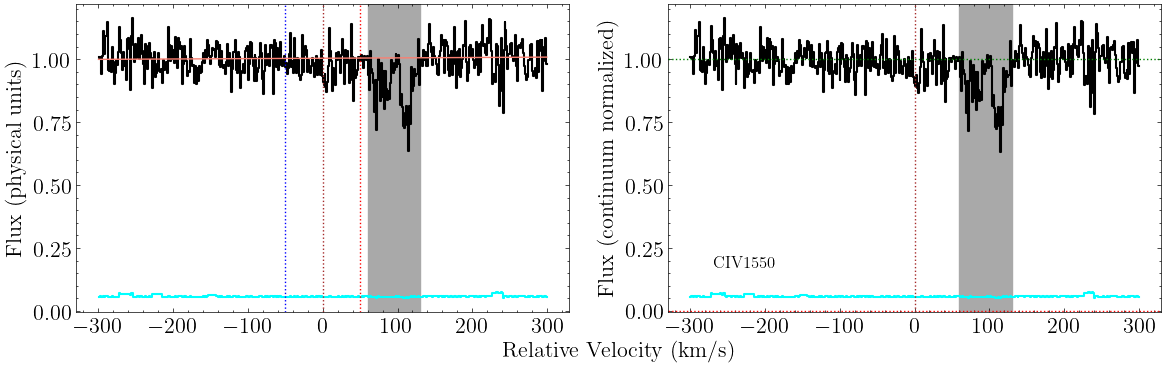

In [26]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

In [27]:
#civ_1548_nuv.get_EW_total(-50,50)

In [28]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [29]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.0, 17, 0]]), 
                             lsf_convolve = True)

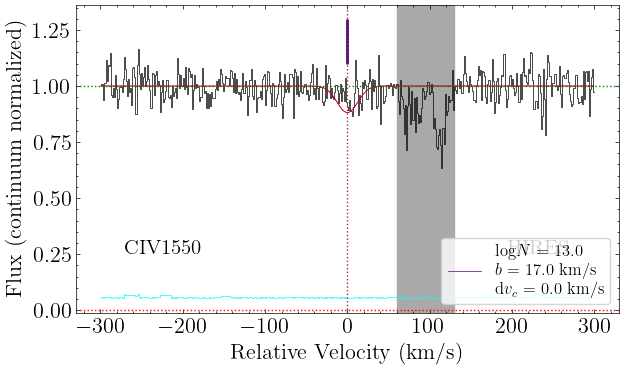

In [30]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [31]:
civ_1550_hires.fit_ion_transition()

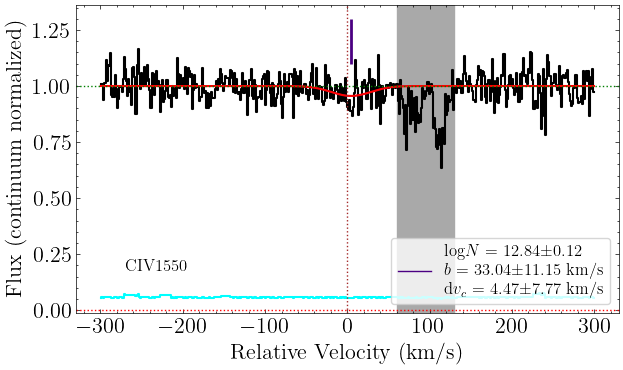

In [32]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

## CIV ion

In [33]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

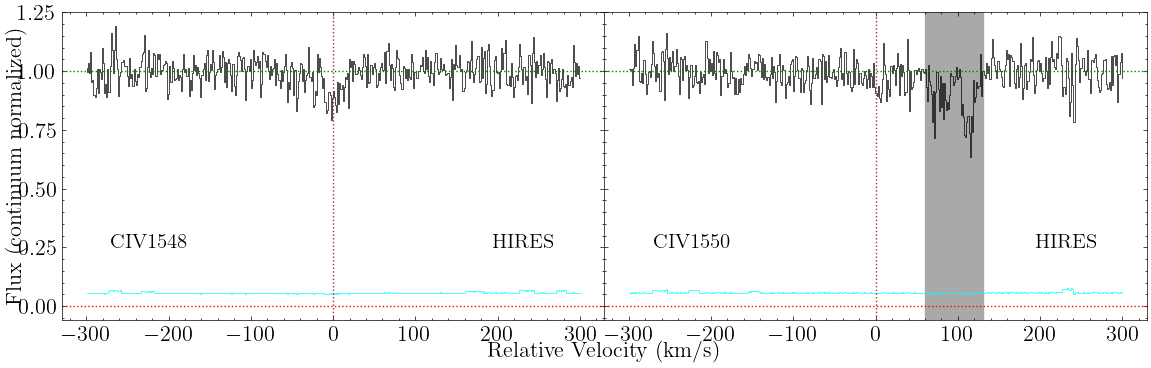

In [34]:
fig, axes = civ.plot_ion()

In [35]:
civ.init_ion([[[12.85, 14, 0]],
              [[12.85, 14, 0]]])

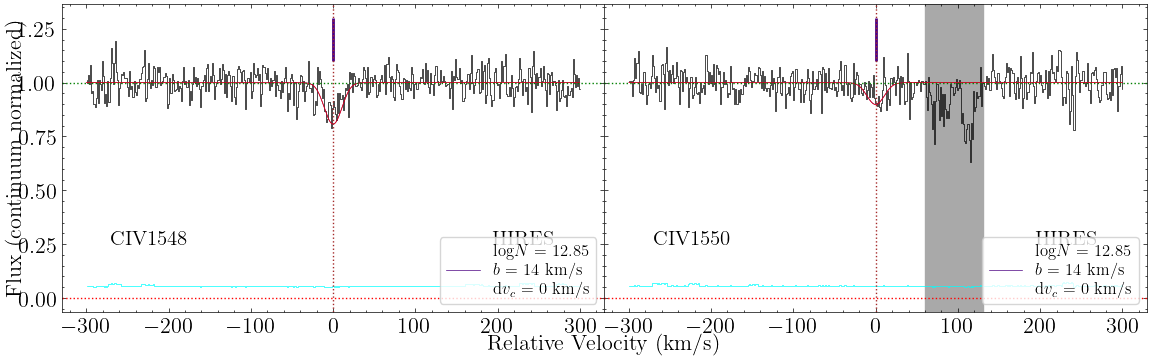

In [36]:
fig, axes = civ.plot_ion_init_fit()

In [37]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                              ])

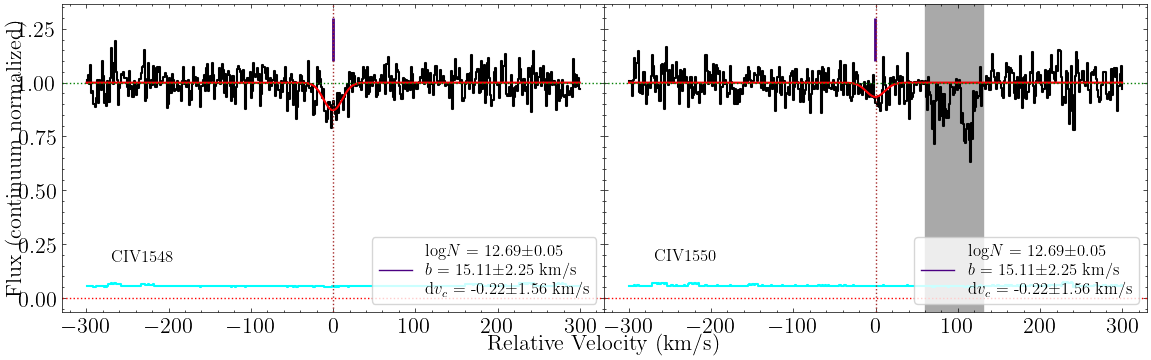

In [38]:
fig, axes = civ.plot_ion_best_fit()

In [39]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#civ.fit_ion_emcee(load=True, loaddir=rootdir)

In [40]:
#fig, axes = civ.plot_samples()

In [41]:
#civ.plot_corner()

# OIV

## OIV 553

In [42]:
oiv_553_fuv = ion_transition('OIV', 553, 'O', z_sys, 'COS FUV')

In [43]:
oiv_553_fuv.grab_ion_transition_info()

In [44]:
oiv_553_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-220,-100]])

In [45]:
oiv_553_fuv.cont_norm_flux(v_abs_range=[-70,50], degree=1)

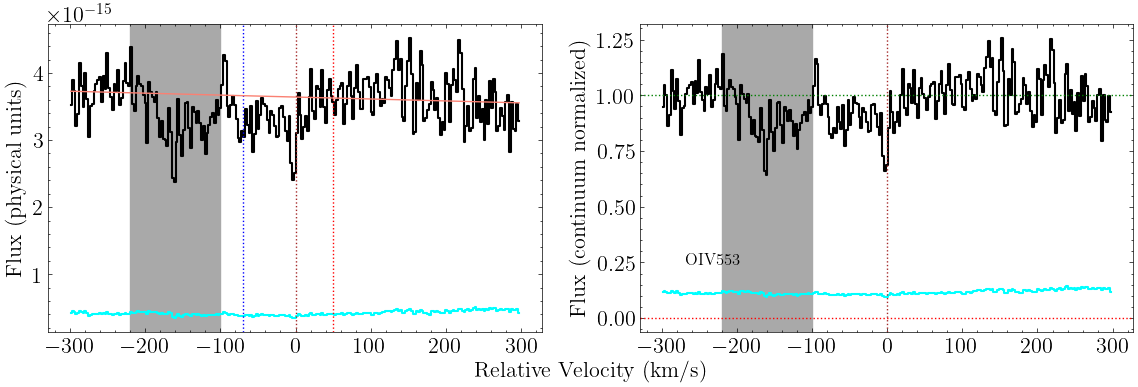

In [46]:
fig, ax = oiv_553_fuv.plot_ion_transition_spec_cont()

In [47]:
oiv_553_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [48]:
oiv_553_fuv.init_ion_transition(init_values = np.array([[13.89, 29, 0]]), 
                             lsf_convolve = True)

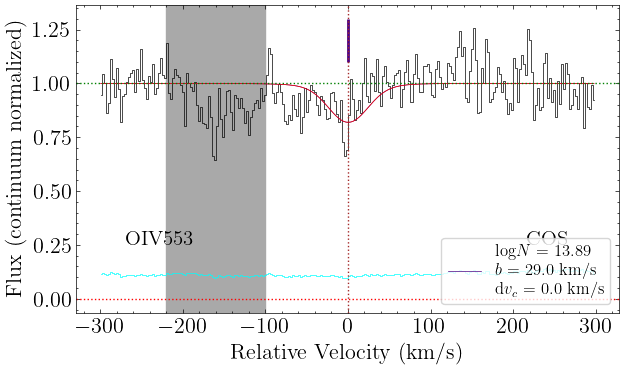

In [49]:
fig, ax = oiv_553_fuv.plot_ion_transition_init_fit()

In [50]:
oiv_553_fuv.fit_ion_transition(fix_params_list = ['it1c1_dv_c'])

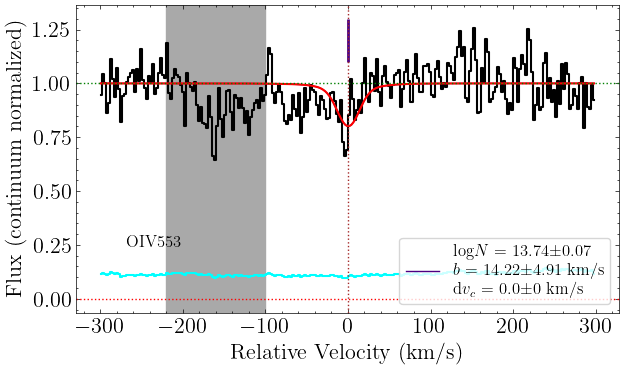

In [51]:
fig, ax = oiv_553_fuv.plot_ion_transition_best_fit()

## OIV 554

In [52]:
oiv_554_fuv = ion_transition('OIV', 554, 'O', z_sys, 'COS FUV')

In [53]:
oiv_554_fuv.grab_ion_transition_info()

In [54]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[25,50],[110,240]])

In [55]:
oiv_554_fuv.cont_norm_flux(v_abs_range=[-70,50], degree=1)

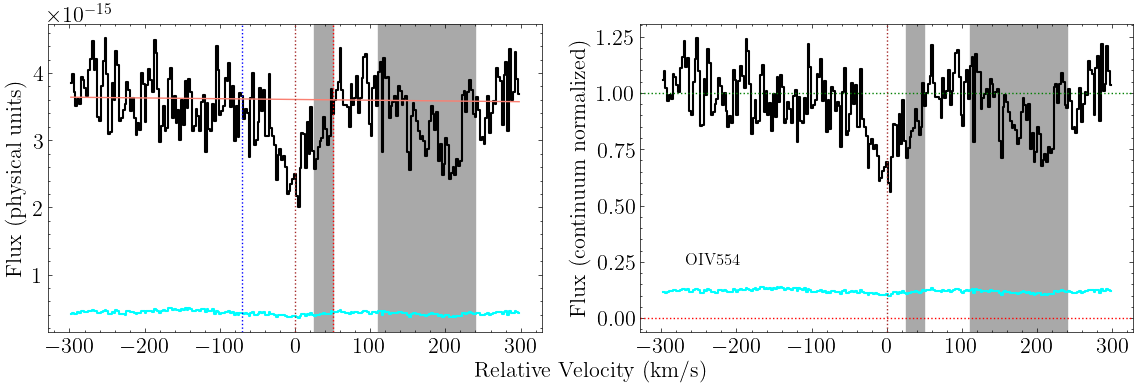

In [56]:
fig, ax = oiv_554_fuv.plot_ion_transition_spec_cont()

In [57]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [58]:
oiv_554_fuv.init_ion_transition(init_values = np.array([[13.85, 21, 0]]), 
                             lsf_convolve = True)

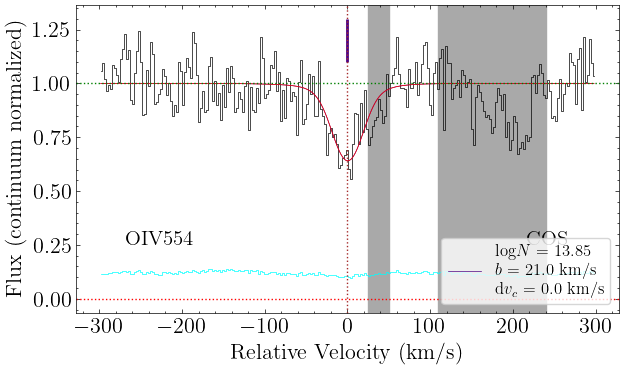

In [59]:
fig, ax = oiv_554_fuv.plot_ion_transition_init_fit()

In [60]:
oiv_554_fuv.fit_ion_transition()

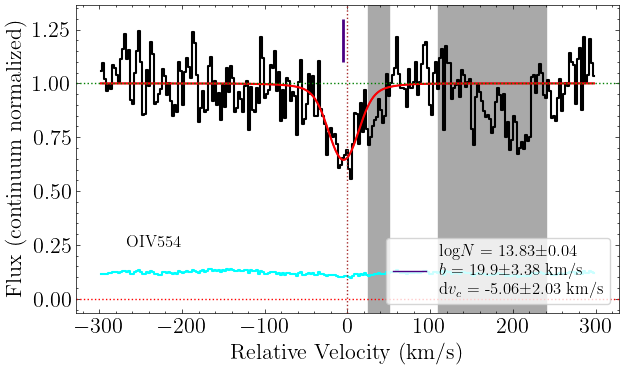

In [61]:
fig, ax = oiv_554_fuv.plot_ion_transition_best_fit()

## OIV 608

In [62]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys, 'COS FUV')

In [63]:
oiv_608_fuv.grab_ion_transition_info()

In [64]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list)

In [65]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-200,50], degree=1)

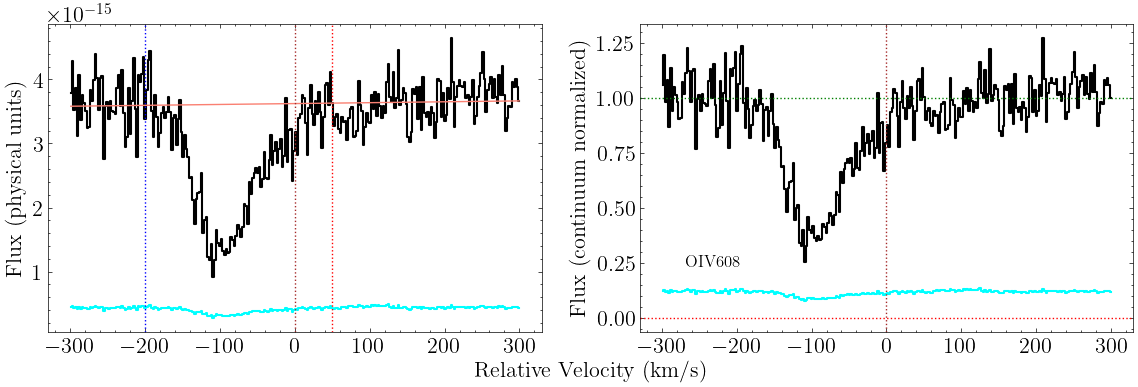

In [66]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

In [67]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [68]:
oiv_608_fuv.init_ion_transition(init_values = np.array([[13.8, 17, 0]]), 
                             lsf_convolve = True)

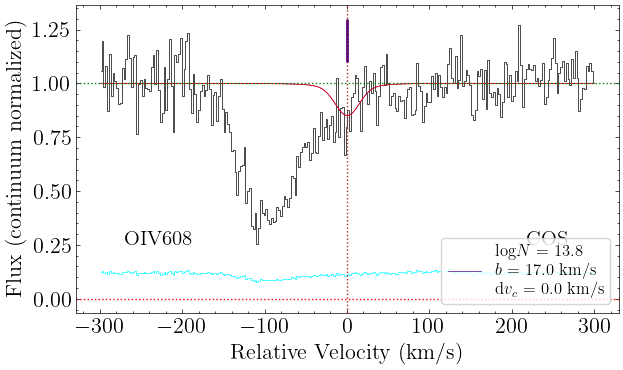

In [69]:
fig, ax = oiv_608_fuv.plot_ion_transition_init_fit()

## OIV 787

In [70]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'COS FUV')

In [71]:
oiv_787_fuv.grab_ion_transition_info()

In [72]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-160],[240,300]])

In [73]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

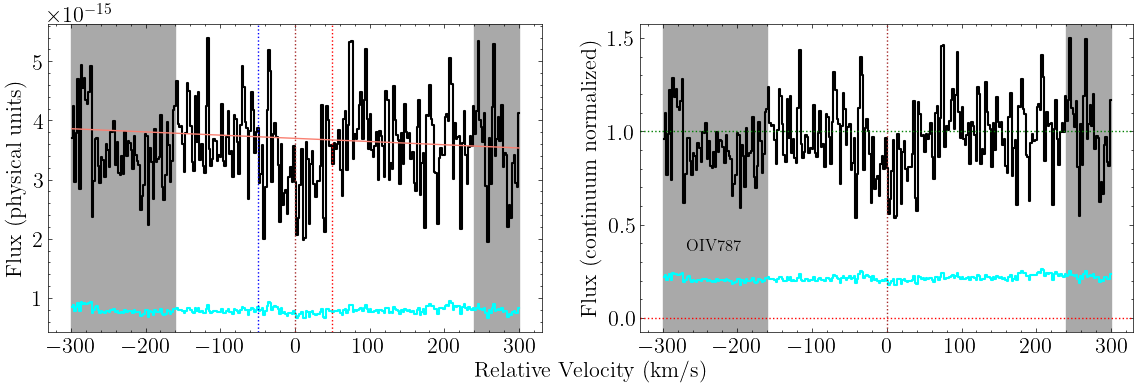

In [74]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

In [75]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [76]:
oiv_787_fuv.init_ion_transition(init_values = np.array([[13.8, 17, 0]]), 
                             lsf_convolve = True)

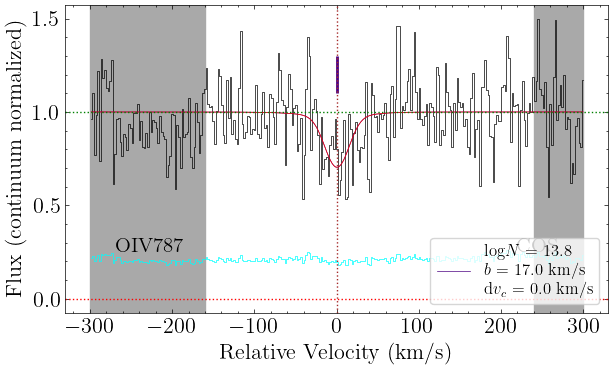

In [77]:
fig, ax = oiv_787_fuv.plot_ion_transition_init_fit()

In [78]:
oiv_787_fuv.fit_ion_transition()

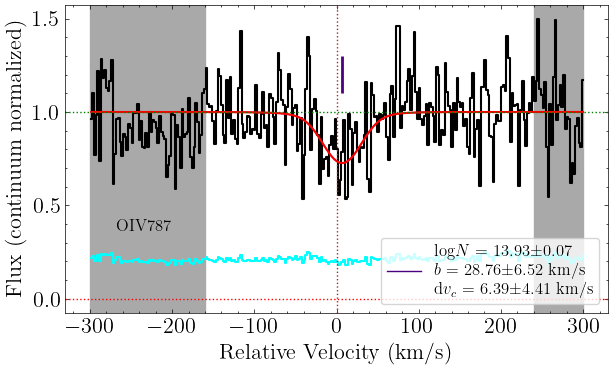

In [79]:
fig, ax = oiv_787_fuv.plot_ion_transition_best_fit()

## OIV ion

In [80]:
oiv = ion(z_sys, 'OIV', [oiv_554_fuv, oiv_787_fuv])

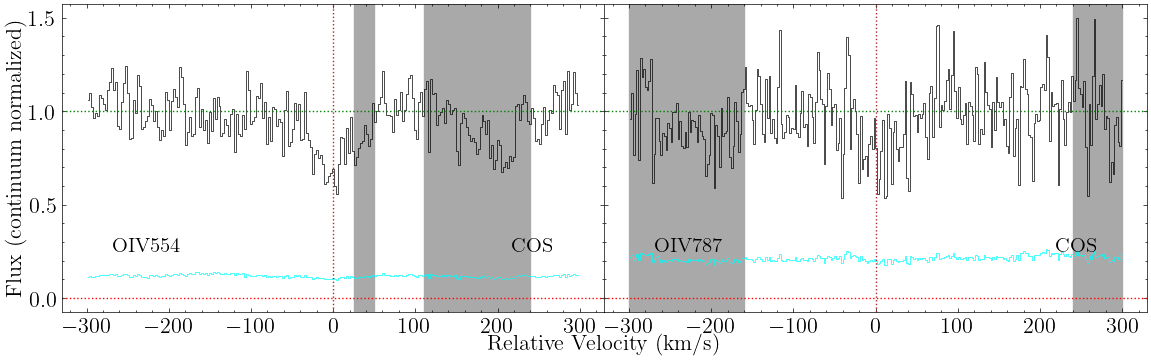

In [81]:
fig, axes = oiv.plot_ion()

In [82]:
oiv.init_ion([[[14.05, 14, 0]],
              [[14.05, 14, 0]]])

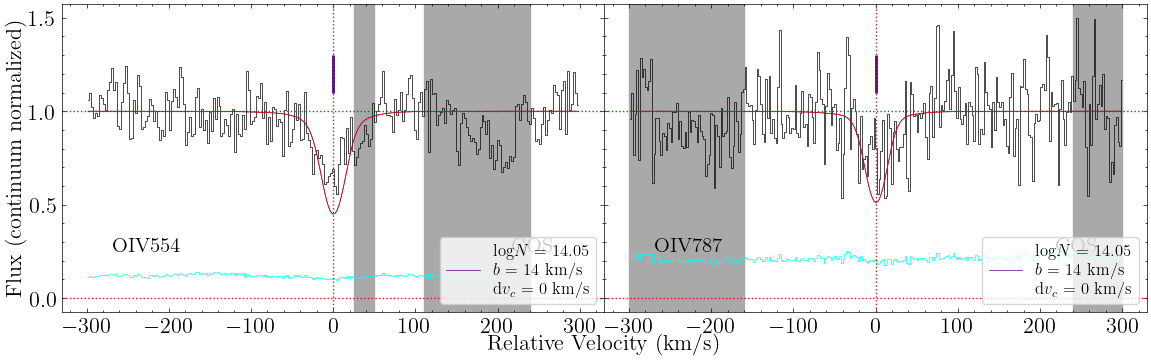

In [83]:
fig, axes = oiv.plot_ion_init_fit()

In [84]:
oiv.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                              ])

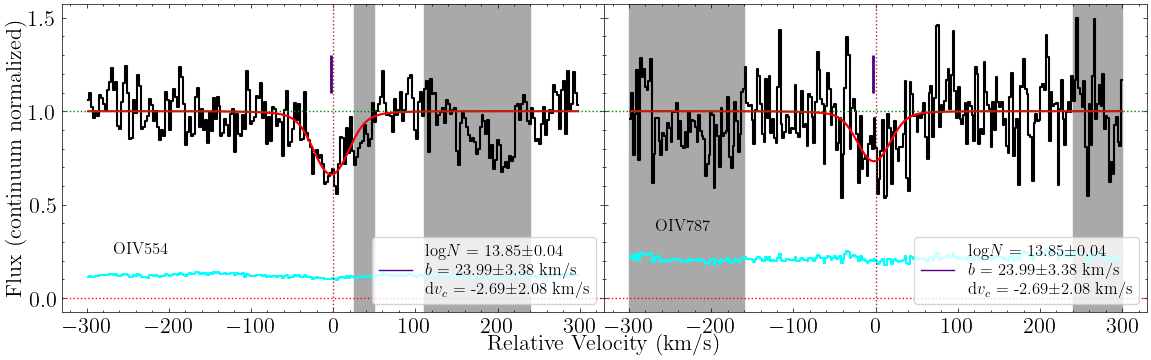

In [85]:
fig, axes = oiv.plot_ion_best_fit()

In [86]:
#oiv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#oiv.fit_ion_emcee(load=True, loaddir=rootdir)

In [87]:
#fig, axes = oiv.plot_samples()

In [88]:
#oiv.plot_corner()

# OV

## OV 629

In [89]:
ov_629_fuv = ion_transition('OV', 629, 'O', z_sys, 'COS FUV')

In [90]:
ov_629_fuv.grab_ion_transition_info(delta_v=-5.2)

In [91]:
ov_629_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200], [-80,-30], [35,150], [200,300]])

In [92]:
ov_629_fuv.cont_norm_flux(v_abs_range=[-80,50], degree=1)

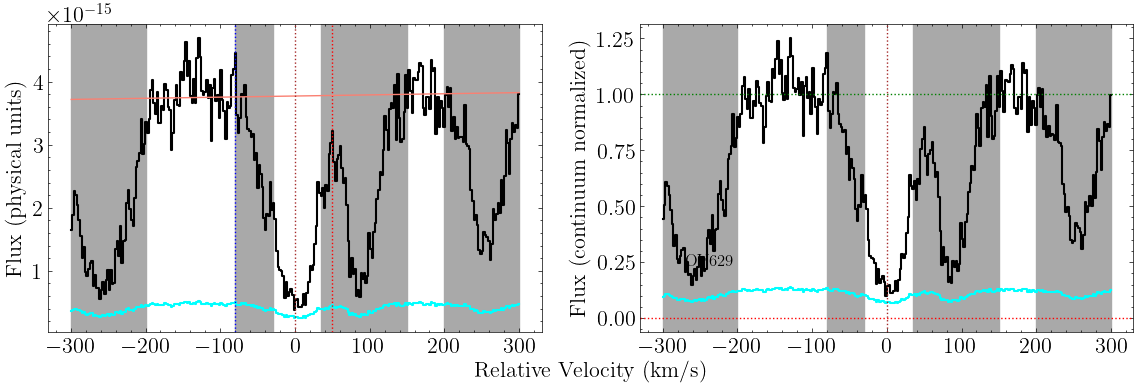

In [93]:
fig, ax = ov_629_fuv.plot_ion_transition_spec_cont()

In [94]:
ov_629_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [95]:
ov_629_fuv.init_ion_transition(init_values = np.array([[14.3, 21, 0]]), 
                             lsf_convolve = True)

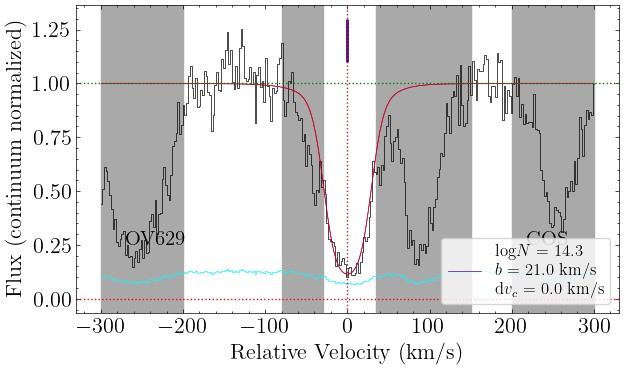

In [96]:
fig, ax = ov_629_fuv.plot_ion_transition_init_fit()

In [97]:
ov_629_fuv.fit_ion_transition()

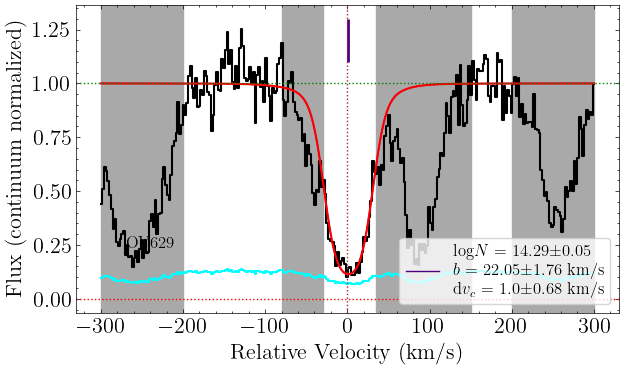

In [98]:
fig, ax = ov_629_fuv.plot_ion_transition_best_fit()

## OV ion

In [99]:
ov = ion(z_sys, 'OV', [ov_629_fuv])

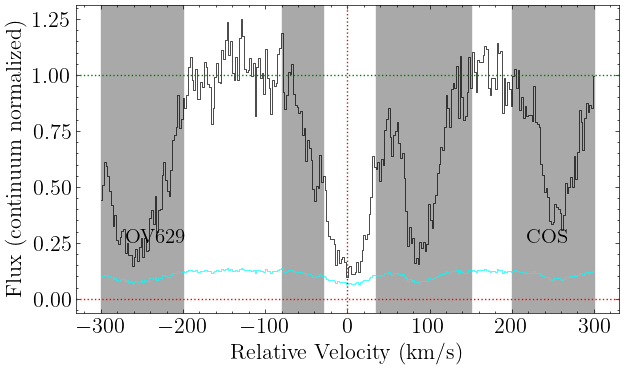

In [100]:
fig, axes = ov.plot_ion()

In [101]:
ov.init_ion([[[14.2, 26, 0]]])

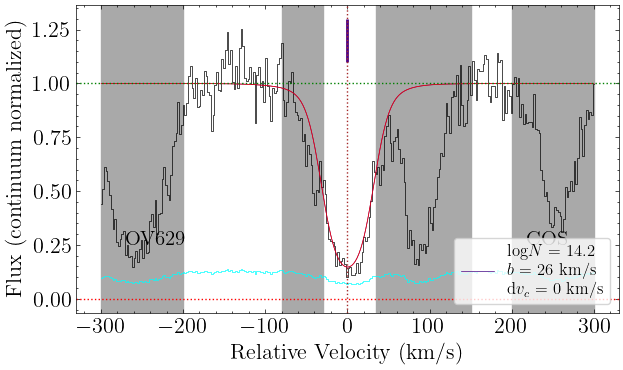

In [102]:
fig, axes = ov.plot_ion_init_fit()

In [103]:
ov.fit_ion(fix_params_list=['it1c1_dv_c'])

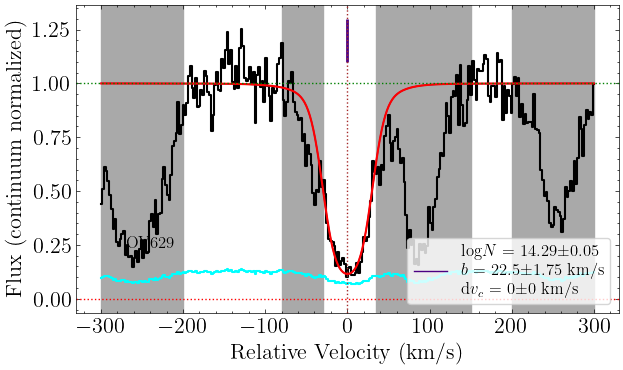

In [104]:
fig, axes = ov.plot_ion_best_fit()

In [105]:
#ov.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=100, n_steps=2500)
#ov.fit_ion_emcee(load=True, loaddir=rootdir)

In [106]:
#fig, axes = ov.plot_samples()

In [107]:
#ov.plot_corner()

# OVI

## OVI 1031

In [108]:
ovi_1031_stis = ion_transition('OVI', 1031, 'O', z_sys, 'STIS')

In [109]:
ovi_1031_stis.grab_ion_transition_info(delta_v=4.45)

In [110]:
ovi_1031_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-70,-25],[110,240]])

In [111]:
ovi_1031_stis.cont_norm_flux(v_abs_range=[-70,50], degree=1)

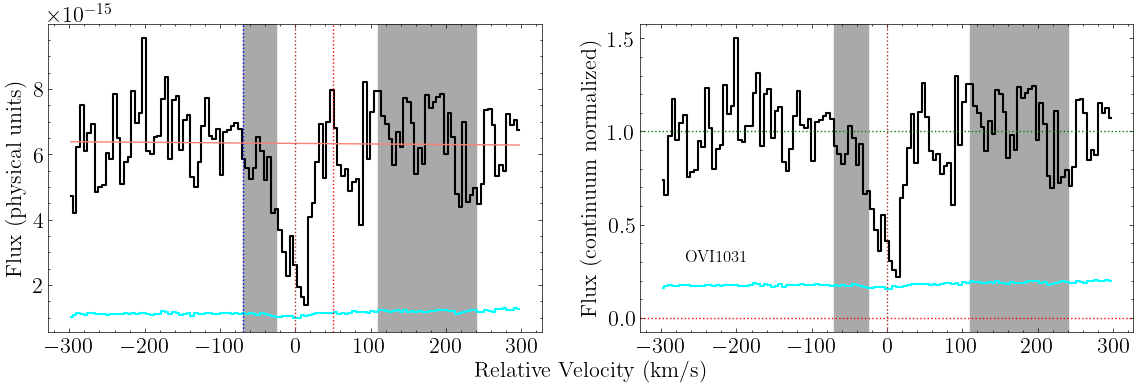

In [112]:
fig, ax = ovi_1031_stis.plot_ion_transition_spec_cont()

In [113]:
ovi_1031_stis.grab_ion_transition_lsf(lsf_fits_list)

In [114]:
ovi_1031_stis.init_ion_transition(init_values = np.array([[14.12, 21, 0]]), 
                             lsf_convolve = True)

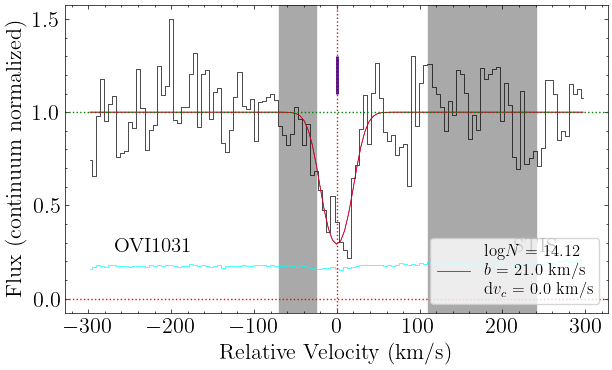

In [115]:
fig, ax = ovi_1031_stis.plot_ion_transition_init_fit()

In [116]:
ovi_1031_stis.fit_ion_transition()

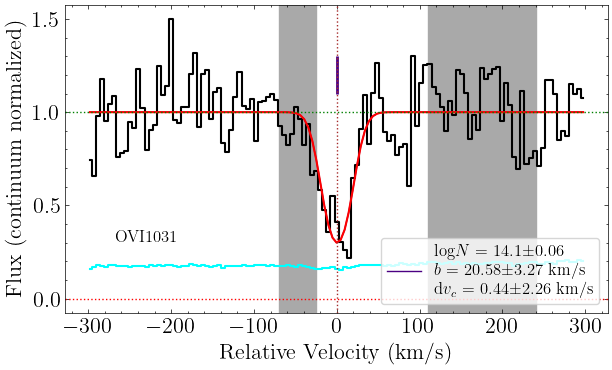

In [117]:
fig, ax = ovi_1031_stis.plot_ion_transition_best_fit()

## OVI 1037

In [118]:
ovi_1037_stis = ion_transition('OVI', 1037, 'O', z_sys, 'STIS')

In [119]:
ovi_1037_stis.grab_ion_transition_info()

In [120]:
ovi_1037_stis.grab_ion_transition_spec(spec_fits_list, masks=[[110,240]])

In [121]:
ovi_1037_stis.cont_norm_flux(v_abs_range=[-120,100], degree=1)

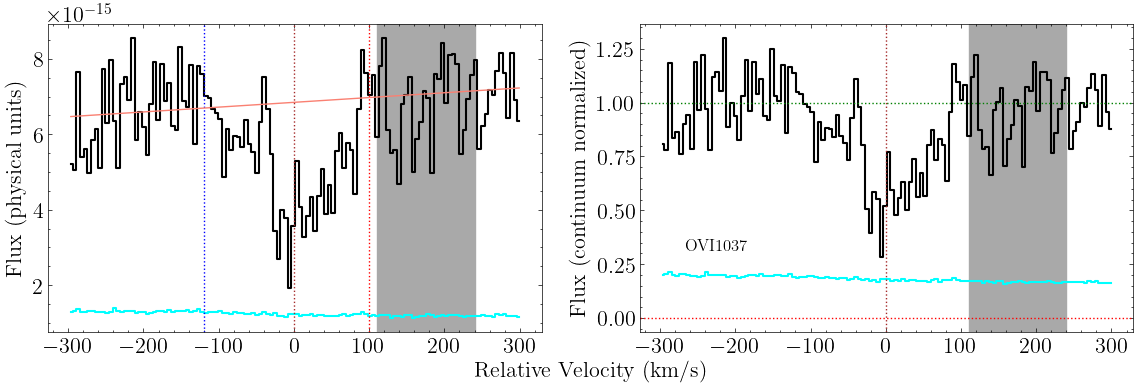

In [122]:
fig, ax = ovi_1037_stis.plot_ion_transition_spec_cont()

In [123]:
ovi_1037_stis.grab_ion_transition_lsf(lsf_fits_list)

In [124]:
ovi_1037_stis.init_ion_transition(init_values = np.array([[14.12, 21, 0]]), 
                             lsf_convolve = True)

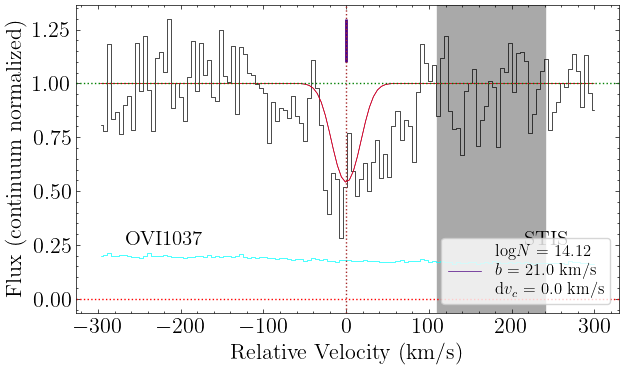

In [125]:
fig, ax = ovi_1037_stis.plot_ion_transition_init_fit()

## OVI ion

In [126]:
ovi = ion(z_sys, 'OVI', [ovi_1031_stis])

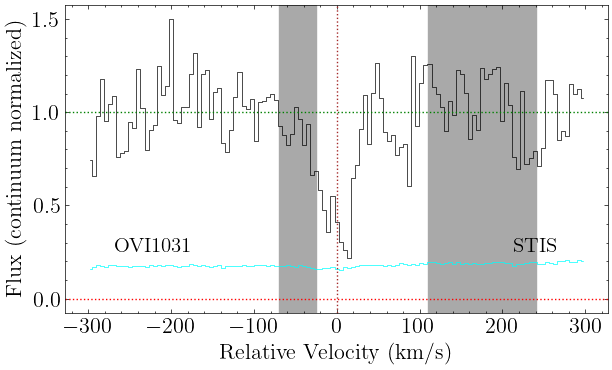

In [127]:
fig, axes = ovi.plot_ion()

In [128]:
ovi.init_ion([[[14.12, 22, 0]]])

(-0.2, 1.4)

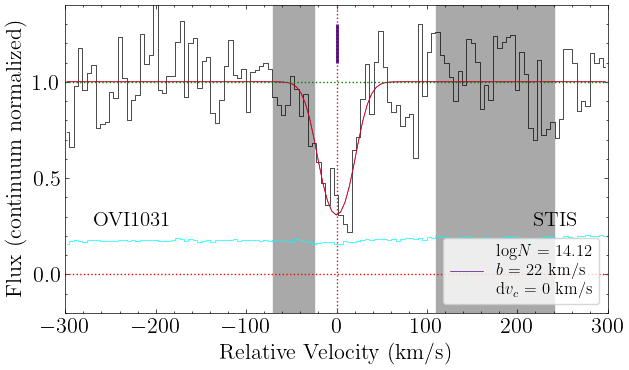

In [129]:
fig, axes = ovi.plot_ion_init_fit()
axes.set_xlim(-300,300)
axes.set_ylim(-0.2,1.4)

# OV + OVI

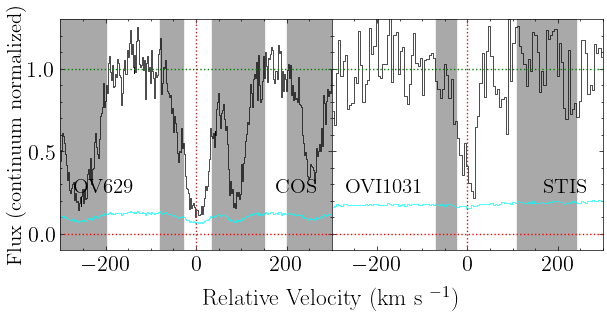

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(2*3.5, 3), sharex=True, sharey=True)

ov_629_fuv.plot_ion_transition_spec(fig=fig, ax=axes[0],label_axes=False)
ovi_1031_stis.plot_ion_transition_spec(fig=fig, ax=axes[1],label_axes=False)

axes[0].set_xlim(-300,300)
axes[0].set_ylim(-0.1,1.3)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'Relative Velocity (km s ${}^{-1}$)', labelpad=25, fontsize=17)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=15)

plt.subplots_adjust(wspace=0, hspace=0)   

# OIV +OV + OVI

Text(0, 0.5, 'Flux (continuum normalized)')

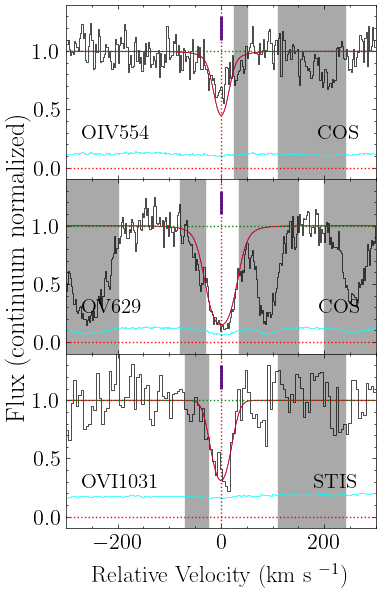

In [131]:
fig, axes = plt.subplots(3, 1, figsize=(4, 1.7*4), sharex=True, sharey=True)


axes[0].set_xlim(-300,300)
axes[0].set_ylim(-0.1, 1.4)
oiv_554_fuv.plot_ion_transition_init_fit(fig=fig, ax=axes[0], legend=False, label_axes=False)



ov_629_fuv.plot_ion_transition_init_fit(fig=fig, ax=axes[1], legend=False, label_axes=False)

ovi_1031_stis.plot_ion_transition_init_fit(fig=fig, ax=axes[2], legend=False, label_axes=False)

plt.subplots_adjust(wspace=0, hspace=0)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'Relative Velocity (km s ${}^{-1}$)', labelpad=25, fontsize=17)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=19)


# CIV + OIV

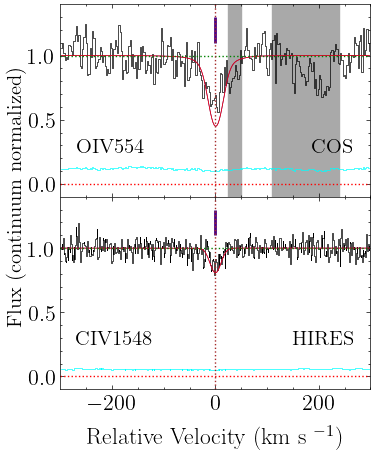

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(4, 2.5*2), sharex=True, sharey=True)

oiv_554_fuv.plot_ion_transition_init_fit(fig=fig, ax=axes[0],label_axes=False,legend=False)
civ_1548_hires.plot_ion_transition_init_fit(fig=fig, ax=axes[1],label_axes=False,legend=False)

axes[0].set_xlim(-300,300)
axes[0].set_ylim(-0.1,1.4)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'Relative Velocity (km s ${}^{-1}$)', labelpad=25, fontsize=17)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=15)

plt.subplots_adjust(wspace=0, hspace=0)   

# HI

## HI 1025

In [133]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [134]:
hi_1025_stis.grab_ion_transition_info()

In [135]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-140,-60],[60,100]])

In [136]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-60,30], degree=1)

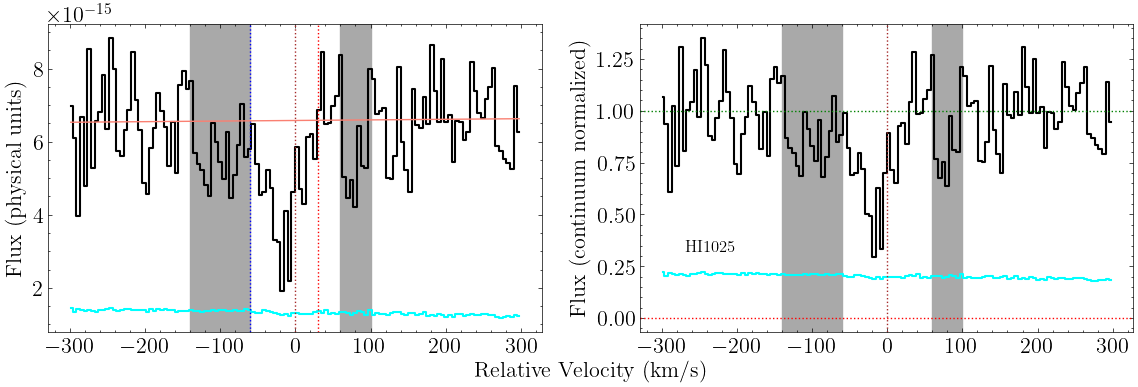

In [137]:
fig, ax = hi_1025_stis.plot_ion_transition_spec_cont()

In [138]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [139]:
hi_1025_stis.init_ion_transition(init_values = np.array([[14.00, 26, 0], [13.89, 39, -32], [13.4, 30, 51], [12.8, 34, 66]]), 
                             lsf_convolve = True)

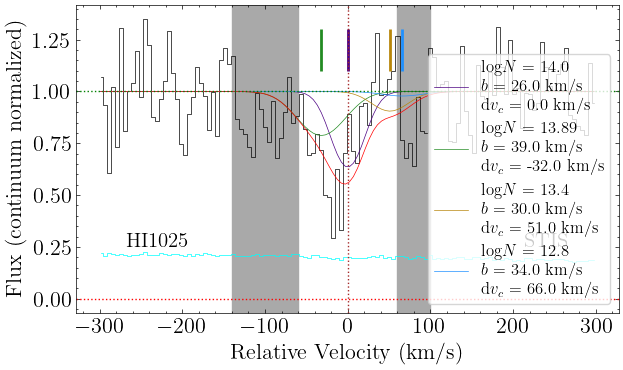

In [140]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [141]:
hi_1025_stis.fit_ion_transition()

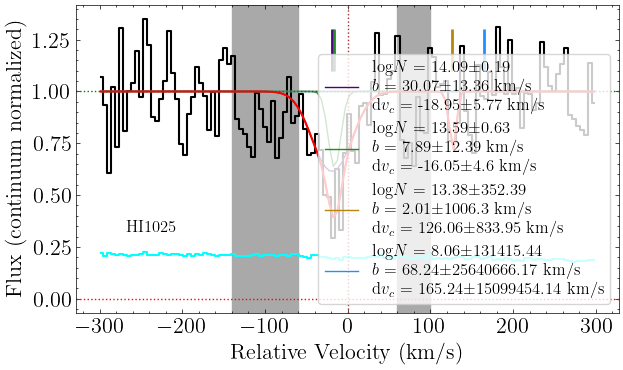

In [142]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

In [143]:
#lyb_flux = hi_1025_stis.best_total_flux

## HI 1025 - subtracted

In [144]:
#hi_1025_stis_re = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [145]:
#hi_1025_stis_re.grab_ion_transition_info()

In [146]:
#hi_1025_stis_re.grab_ion_transition_spec(spec_fits_list, masks=[[-140,-60]])

In [147]:
#hi_1025_stis_re.cont_norm_flux(v_abs_range=[-60,30], degree=1)

In [148]:
#hi_1025_stis_re.flux_norm = hi_1025_stis_re.flux_norm/lyb_flux

In [149]:
#fig, ax = hi_1025_stis_re.plot_ion_transition_spec()

In [150]:
#hi_1025_stis_re.grab_ion_transition_lsf(lsf_fits_list)

In [151]:
#hi_1025_stis_re.init_ion_transition(init_values = np.array([[14.18, 24, -17]]), 
#                             lsf_convolve = True)

In [152]:
#hi_1025_stis_re.fit_ion_transition()

## HI 1215

In [153]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [154]:
hi_1215_stis.grab_ion_transition_info()

In [155]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list)#, masks=[[30,120]])

In [156]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-120,120], degree=1)

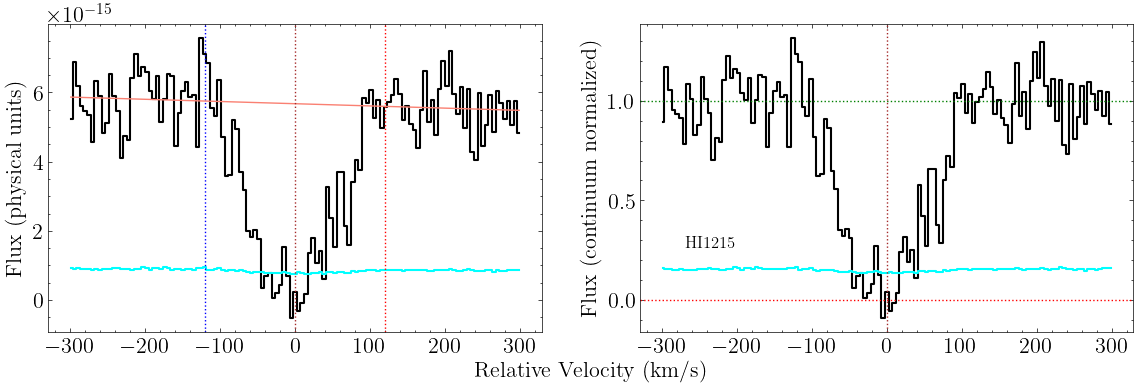

In [157]:
fig, ax = hi_1215_stis.plot_ion_transition_spec_cont()

In [158]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [159]:
hi_1215_stis.init_ion_transition(init_values = np.array([[14.00, 26, 0], [13.89, 39, -32], [13.4, 30, 51], [12.8, 34, 66]]), 
                             lsf_convolve = True)

In [160]:
#v_clip_lo = -35
#v_clip_hi = 0

(-0.2, 1.4)

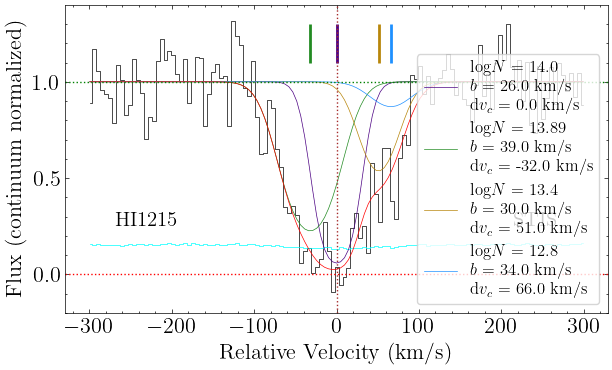

In [161]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()
#ax.axvline(v_clip_lo, linestyle=':', lw=2)
#ax.axvline(v_clip_hi, linestyle=':', lw=2)

ax.set_ylim(-0.2, 1.4)

In [162]:
#lya_flux = hi_1215_stis.init_total_flux

In [163]:
hi_1215_stis.fit_ion_transition(fix_params_list = ['it1c1_b', 'it1c1_dv_c', 'it1c2_dv_c'])

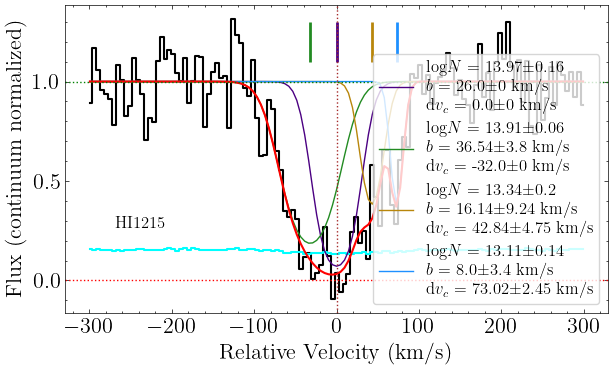

In [164]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit()

## HI 1215 - subtracted

In [165]:
#hi_1215_stis_re = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [166]:
#hi_1215_stis_re.grab_ion_transition_info()

In [167]:
#hi_1215_stis_re.grab_ion_transition_spec(spec_fits_list)#, masks=[[30,120]])

In [168]:
#hi_1215_stis_re.cont_norm_flux(v_abs_range=[-120,120], degree=1)

In [169]:
#hi_1215_stis_re.flux_norm[hi_1215_stis_re.flux_norm<0] = 0.01

In [170]:
#idx = (hi_1215_stis_re.v<v_clip_lo)|(hi_1215_stis_re.v>v_clip_hi)
#hi_1215_stis_re.flux_norm[idx] = hi_1215_stis_re.flux_norm[idx]/lya_flux[idx]
#hi_1215_stis_re.flux_norm[~idx] = (1+hi_1215_stis_re.flux_norm[~idx])/(1+lya_flux[~idx])

In [171]:
#fig, ax = hi_1215_stis_re.plot_ion_transition_spec()

#ax.set_ylim(-0.2, 1.4)

In [172]:
#hi_1215_stis_re.grab_ion_transition_lsf(lsf_fits_list)

In [173]:
#hi_1215_stis_re.init_ion_transition(init_values = np.array([[14.18, 24, -17]]), 
#                             lsf_convolve = True)

In [174]:
#hi_1215_stis_re.fit_ion_transition()

## HI ion - subtracted

In [175]:
#hi_re = ion(z_sys, 'HI', [hi_1215_stis_re, hi_1025_stis_re])

In [176]:
#fig, axes = hi_re.plot_ion()

In [177]:
#hi_re.init_ion([[[13.4, 35, -38],[14.0, 33, 30]],
#              [[13.4, 35, -38],[14.0, 33, 30]]])

In [178]:
#fig, axes = hi_re.plot_ion_init_fit()

In [179]:
#hi_re.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
#                              ['it1c2_logN', 'it2c2_logN'],
#                              ['it1c1_b', 'it2c1_b'],
#                              ['it1c2_b', 'it2c2_b'],
#                              ['it1c1_dv_c', 'it2c1_dv_c'],
#                              ['it1c2_dv_c', 'it2c2_dv_c']],)
          #exclude_models = ['it1c1_dv_c < it1c2_dv_c', 'it1c1_logN < it1c2_logN', 'it1c1_b > it1c2_b',
          #                   'it1c1_dv_c > it1c3_dv_c', 'it1c1_logN < it1c3_logN', 'it1c1_b > it1c3_b', 
          #                   'it1c2_logN > it1c3_logN', 'it1c2_b > it1c3_b'],
          #lower_bounds_dict = {'it1c1_b':7.5, 'it1c2_b':10, 'it1c2_dv_c':-130},
          #fix_params_list = ['it1c1_dv_c'])
        #exclude_models = ['it1c1_logN < it1c2_logN', 'it1c1_b > it1c2_b'])

In [180]:
#fig, axes = hi_re.plot_ion_best_fit()

## HI ion

In [181]:
hi = ion(z_sys, 'HI', [hi_1215_stis, hi_1025_stis])

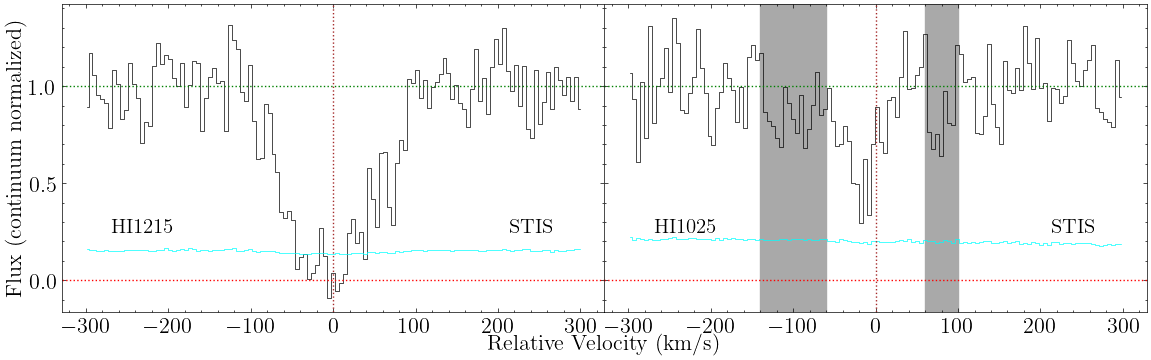

In [182]:
fig, axes = hi.plot_ion()

In [183]:
hi.init_ion([[[14.18, 20, 0],[13.98, 34, -30],[13.6, 25, 30],[13.4, 30, 65]],
              [[14.18, 20, 0],[13.98, 34, -30],[13.6, 25, 30],[13.4, 30, 65]]])

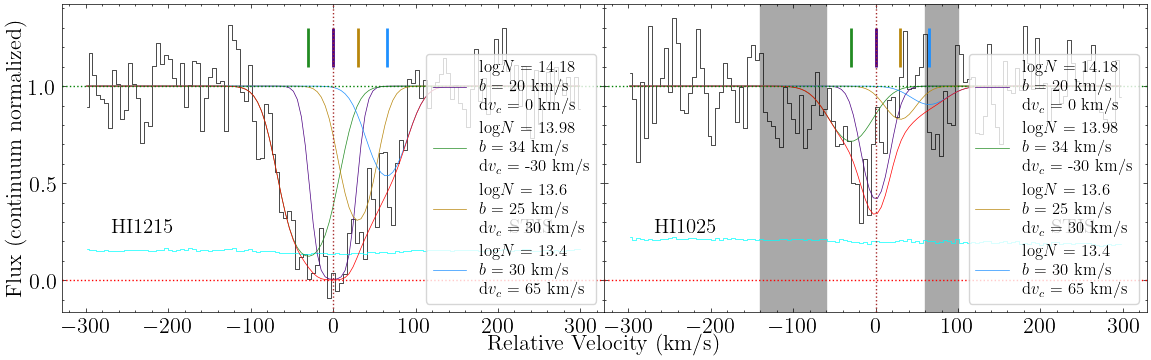

In [184]:
fig, axes = hi.plot_ion_init_fit()

In [185]:
hi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                              ['it1c2_logN', 'it2c2_logN'],
                              ['it1c3_logN', 'it2c3_logN'],
                              ['it1c4_logN', 'it2c4_logN'],
                              ['it1c1_b', 'it2c1_b'],
                              ['it1c2_b', 'it2c2_b'],
                              ['it1c3_b', 'it2c3_b'],
                              ['it1c4_b', 'it2c4_b'],
                              ['it1c1_dv_c', 'it2c1_dv_c'],
                              ['it1c2_dv_c', 'it2c2_dv_c'],
                              ['it1c3_dv_c', 'it2c3_dv_c'],
                              ['it1c4_dv_c', 'it2c4_dv_c']],
          exclude_models = ['it1c1_dv_c < it1c2_dv_c', 'it1c1_dv_c > it1c3_dv_c', 'it1c3_dv_c > it1c4_dv_c', 
                            'it1c1_b > it1c3_b', 'it1c3_b > it1c4_b', 'it1c2_b < it1c4_b', 
                            'it1c1_logN < it1c2_logN', 
                            'it1c3_logN < it1c4_logN'],
          lower_bounds_dict = {'it1c1_b':7.5, 'it1c3_b':6, 'it1c3_dv_c':15},
          upper_bounds_dict = {'it1c2_dv_c':-15, 'it1c4_dv_c':100},
          #exclude_models = ['it1c1_dv_c < it1c2_dv_c', 'it1c1_logN < it1c2_logN', 'it1c1_b > it1c2_b',
          #                   'it1c1_dv_c > it1c3_dv_c', 'it1c1_logN < it1c3_logN', 'it1c1_b > it1c3_b', 
          #                   'it1c2_logN > it1c3_logN', 'it1c2_b > it1c3_b'],
          #lower_bounds_dict = {'it1c1_b':7.5, 'it1c2_b':10, 'it1c2_dv_c':-130},
          fix_params_list = ['it1c1_dv_c'])

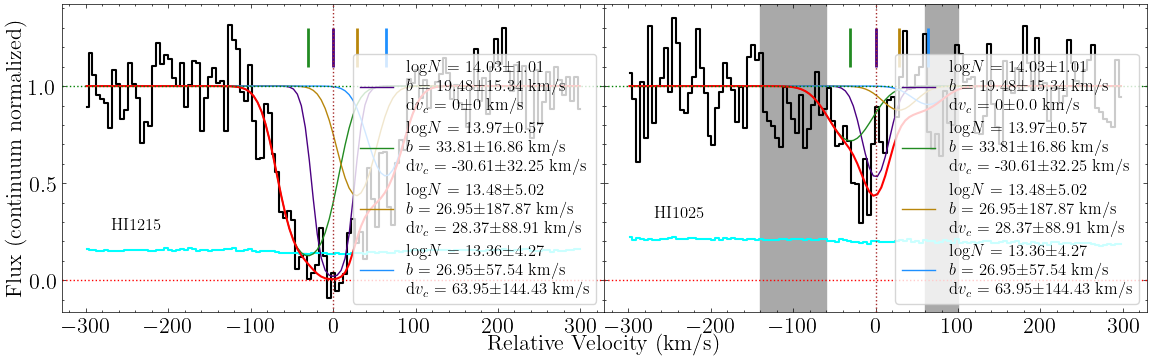

In [186]:
fig, axes = hi.plot_ion_best_fit()

In [187]:
#hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-18, n_walkers=100, n_steps=2500)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

In [188]:
#fig, axes = hi.plot_samples()

In [189]:
#hi.plot_corner()

## HI 972

In [190]:
hi_972_stis = ion_transition('HI', 972, 'H', z_sys, 'STIS')

In [191]:
hi_972_stis.grab_ion_transition_info()

In [192]:
hi_972_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-220,-100],[0,100],[160,300]])

In [193]:
hi_972_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

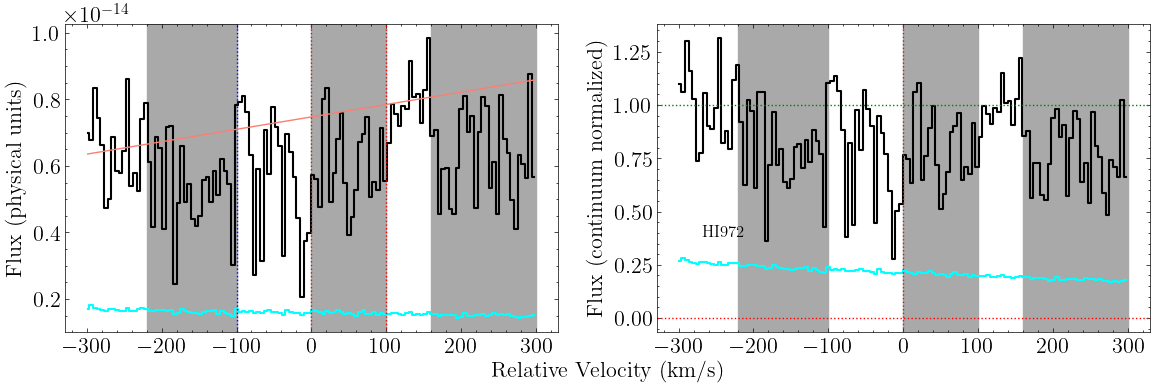

In [194]:
fig, ax = hi_972_stis.plot_ion_transition_spec_cont()

In [195]:
hi_972_stis.grab_ion_transition_lsf(lsf_fits_list)

In [196]:
hi_972_stis.init_ion_transition(init_values = np.array([[14.2, 31, -17]]), 
                             lsf_convolve = True)

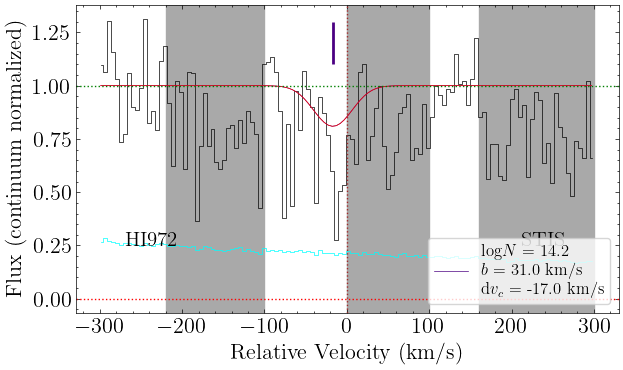

In [197]:
fig, ax = hi_972_stis.plot_ion_transition_init_fit()

# OIV + HI

Text(0, 0.5, 'Flux (continuum normalized)')

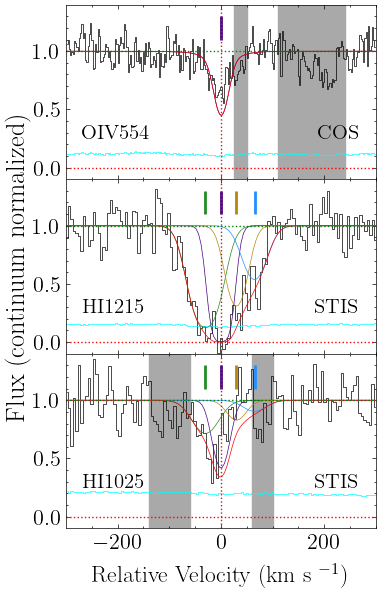

In [198]:
fig, axes = plt.subplots(3, 1, figsize=(4, 1.7*4), sharex=True, sharey=True)


axes[0].set_xlim(-300,300)
axes[0].set_ylim(-0.1, 1.4)

oiv_554_fuv.plot_ion_transition_init_fit(fig=fig, ax=axes[0], legend=False, label_axes=False)

hi_1215_stis.plot_ion_transition_init_fit(fig=fig, ax=axes[1], legend=False, label_axes=False)

hi_1025_stis.plot_ion_transition_init_fit(fig=fig, ax=axes[2], legend=False, label_axes=False)


plt.subplots_adjust(wspace=0, hspace=0)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'Relative Velocity (km s ${}^{-1}$)', labelpad=25, fontsize=17)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=19)

# HI + CIV + OIV + OV + OVI

In [199]:
hi_civ_oiv_ov_ovi = ion_suite(z_sys, 'HI+CIV+OIV+OV+OVI', [hi, civ, oiv, ov, ovi])

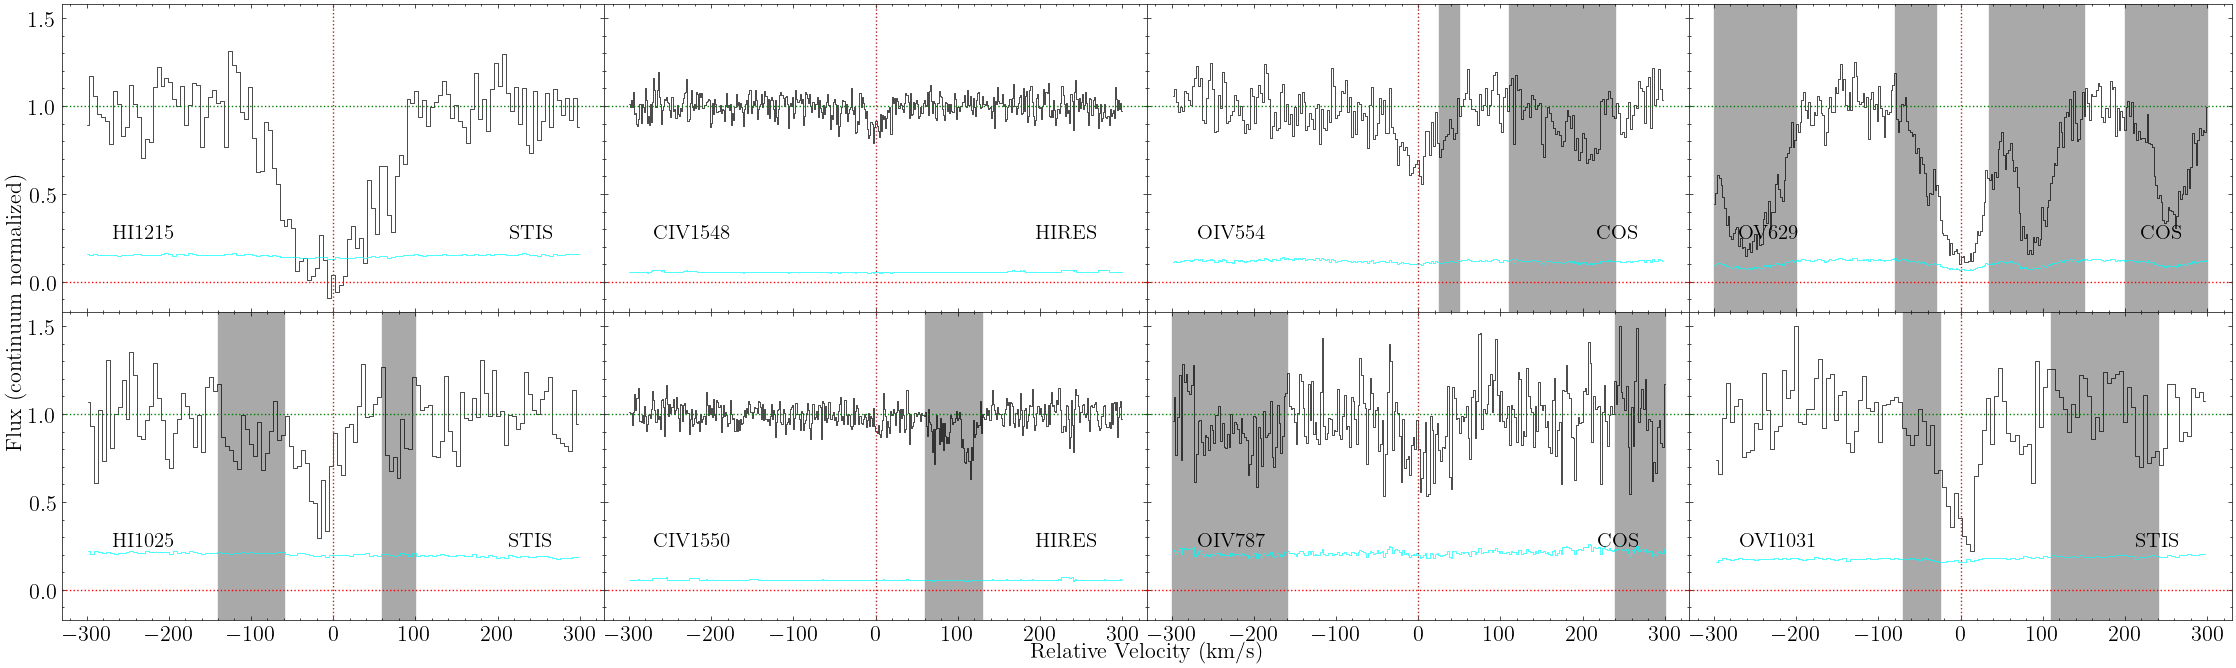

In [200]:
fig, axes = hi_civ_oiv_ov_ovi.plot_ion_suite(n_cols=4)

In [201]:
hi_civ_oiv_ov_ovi.init_ion_suite([
                          [[14.0, 25, 0],[13.9, 39, -31],[13.4, 29, 50],[13.0, 34, 65]], # HI
                          [[14.0, 25, 0],[13.9, 39, -31],[13.4, 29, 50],[13.0, 34, 65]],
                          [[12.7, 17, 0]], # CIV
                          [[12.7, 17, 0]],
                          [[13.9, 17, 0]], # OIV
                          [[13.9, 17, 0]],
                          [[14.4, 17, 0]], # OV
                          [[14.1, 17, 0]]]) # OVI

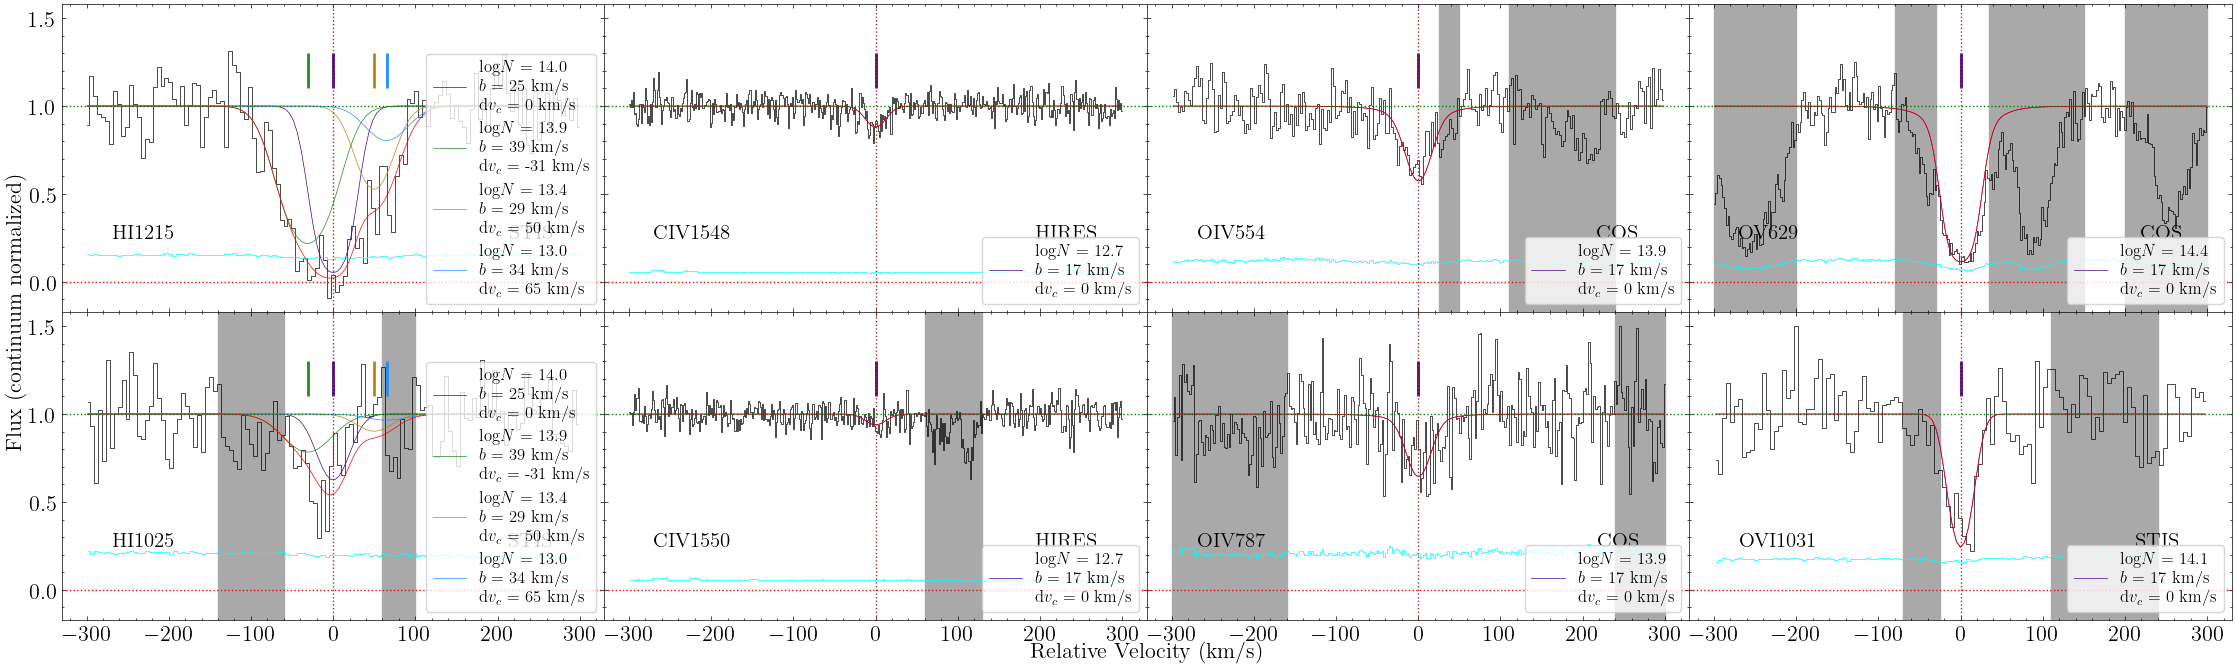

In [202]:
fig, axes = hi_civ_oiv_ov_ovi.plot_ion_suite_init_fit(n_cols=4)

In [203]:
hi_civ_oiv_ov_ovi.fit_ion_suite(tie_params_list=[
        ['it1c2_logN', 'it2c2_logN'], # Tie logN for HI component 2
        ['it1c2_b', 'it2c2_b'], # Tie b for HI component 2
        ['it1c2_dv_c', 'it2c2_dv_c'], # Tie centroids for HI component 2
        ['it1c3_logN', 'it2c3_logN'], # Tie logN for HI component 3
        ['it1c3_b', 'it2c3_b'], # Tie b for HI component 3
        ['it1c3_dv_c', 'it2c3_dv_c'], # Tie centroids for HI component 3
        ['it1c4_logN', 'it2c4_logN'], # Tie logN for HI component 3
        ['it1c4_b', 'it2c4_b'], # Tie b for HI component 3
        ['it1c4_dv_c', 'it2c4_dv_c'], # Tie centroids for HI component 3
        ['it1c1_logN', 'it2c1_logN'], # Tie logN for HI component 1
        ['it1c1_b', 'it2c1_b'], # Tie b for HI component 1
        ['it3c1_logN', 'it4c1_logN'], # Tie logN for CIV component 1
        ['it3c1_b', 'it4c1_b'], # Tie b for CIV component 1
        ['it5c1_logN', 'it6c1_logN'], # Tie logN for OIV component 1
        ['it5c1_b', 'it6c1_b'], # Tie b for OIV, OV, OVI component 1
        ['it5c1_b', 'it7c1_b'],
        ['it5c1_b', 'it8c1_b'],
        ['it1c1_dv_c', 'it2c1_dv_c'], # Tie dv_c for HI, CIV, OIV, OV, OVI component 1
        ['it1c1_dv_c', 'it3c1_dv_c'],
        ['it1c1_dv_c', 'it4c1_dv_c'],
        ['it1c1_dv_c', 'it5c1_dv_c'],
        ['it1c1_dv_c', 'it6c1_dv_c'],
        ['it1c1_dv_c', 'it7c1_dv_c'],    
        ['it1c1_dv_c', 'it8c1_dv_c']],
        exclude_models = ['it1c1_dv_c < it1c2_dv_c', 'it1c1_dv_c > it1c3_dv_c', 'it1c3_dv_c > it1c4_dv_c', 
                          'it1c1_b > it1c3_b', 'it1c3_b > it1c4_b', 'it1c2_b < it1c4_b', 
                          'it1c1_logN < it1c2_logN', 'it1c3_logN < it1c4_logN'],
        lower_bounds_dict = {'it1c1_b':7.5, 'it1c3_b':6, 'it1c3_dv_c':20},
        upper_bounds_dict = {'it1c2_dv_c':-20, 'it1c4_dv_c':100},)

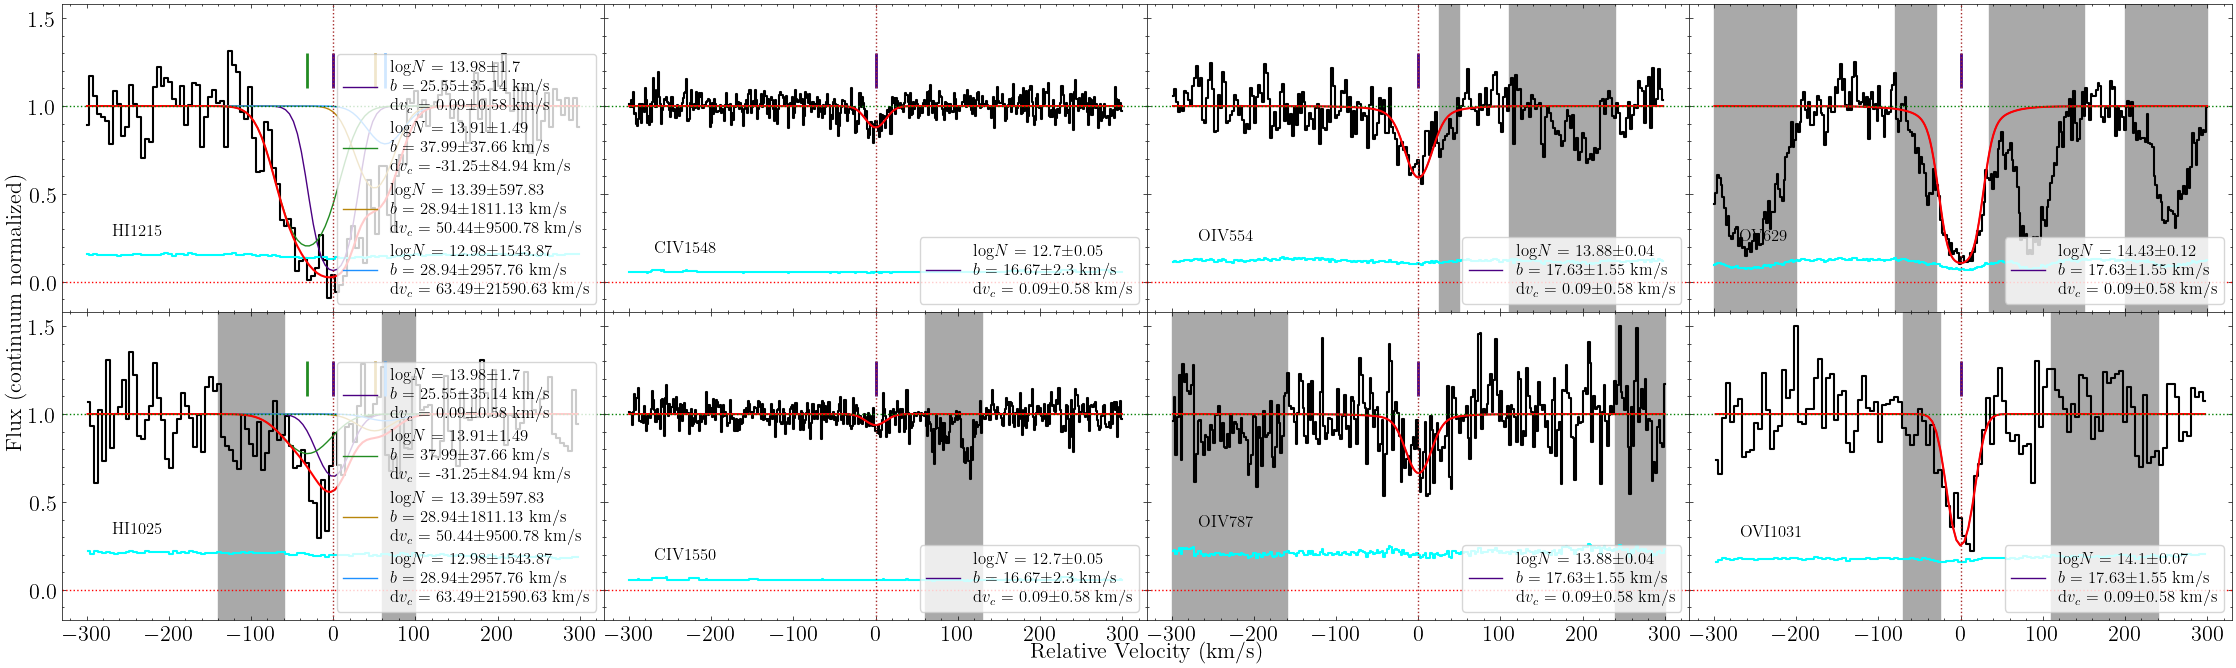

In [204]:
fig, axes = hi_civ_oiv_ov_ovi.plot_ion_suite_best_fit(n_cols=4)

In [205]:
len(hi_civ_oiv_ov_ovi.result.var_names)

18

In [207]:
hi_civ_oiv_ov_ovi.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, scale_covar=1e-21, n_steps=5000)
#hi_civ_oiv_ov_ovi.fit_ion_suite_emcee(load=True, loaddir=rootdir)

100%|███████████████████████████████████████| 5000/5000 [52:24<00:00,  1.59it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 18 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [305.65701759 318.90710648 300.14350858 309.38019446 313.93099983
 308.31727057 314.19282479 317.29074103 324.67079898 340.31368171
 349.74165237 307.56177587 298.9764691  329.20046591 296.64040994
 481.16705068 389.8882568  282.49447922]


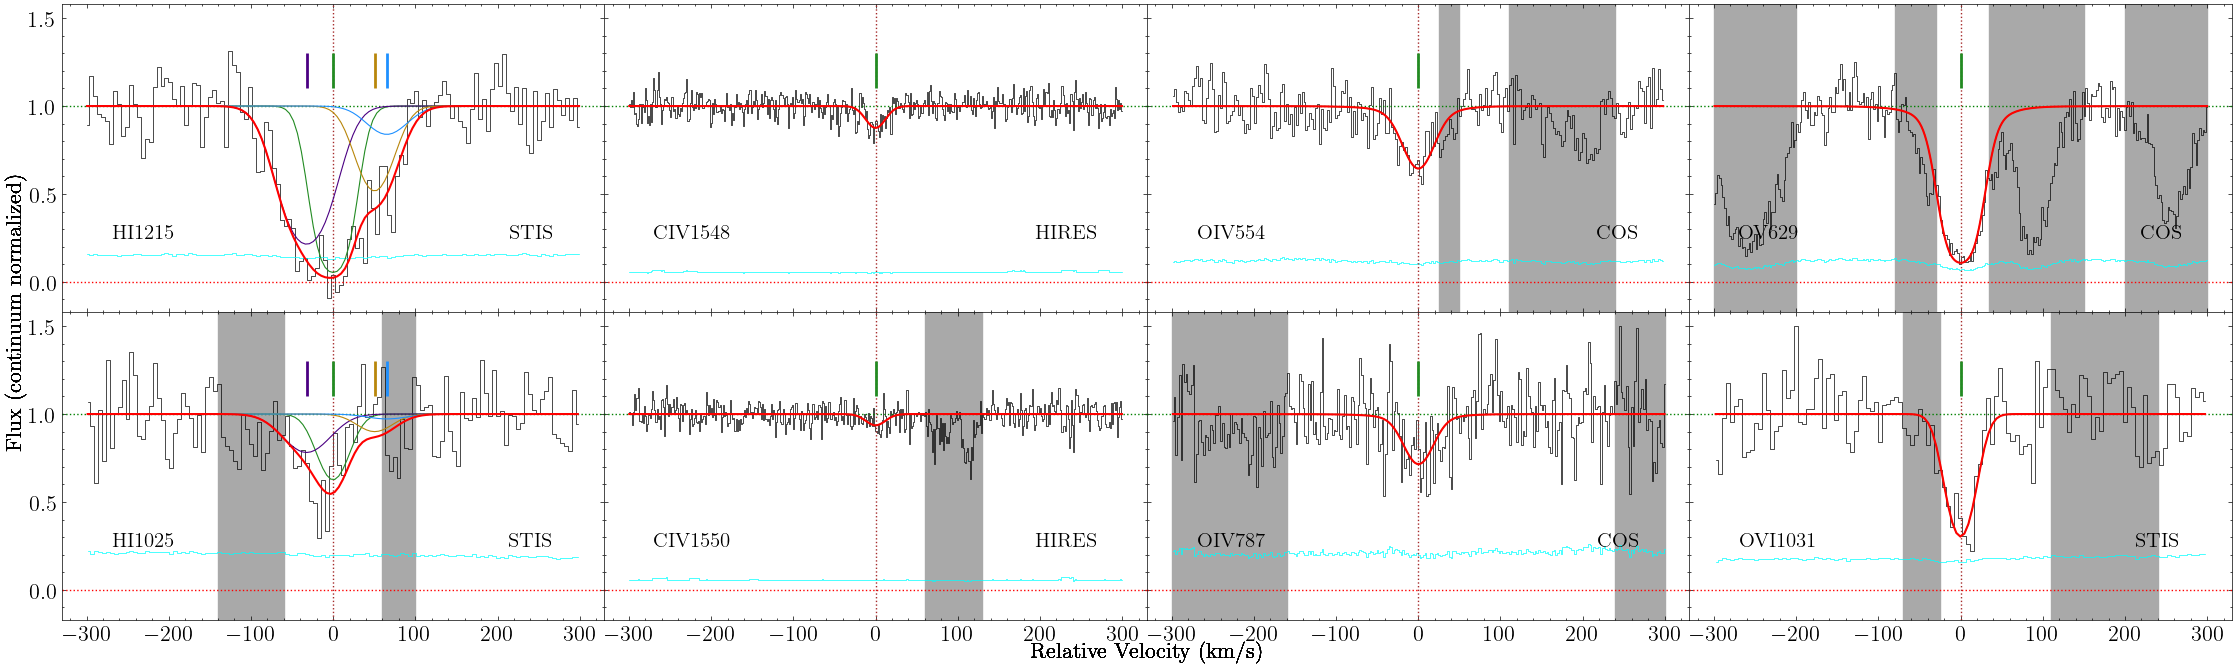

In [208]:
fig, axes = hi_civ_oiv_ov_ovi.plot_samples(n_cols=4)

In [216]:
#hi_civ_oiv_ov_ovi.plot_corner()

In [217]:
np.median(hi_civ_oiv_ov_ovi.result_emcee.flatchain['it1c1_dv_c'])

-0.047474634133512675

In [218]:
np.median(hi_civ_oiv_ov_ovi.result_emcee.flatchain['it1c1_dv_c'])-np.percentile(hi_civ_oiv_ov_ovi.result_emcee.flatchain['it1c1_dv_c'], 100*(1-cdf_1sig))

0.7450380069704773

In [219]:
np.median(hi_civ_oiv_ov_ovi.result_emcee.flatchain['it1c4_logN'])

12.893618720386376

# Summary List
Now compile a summary list

In [220]:
summary = ion_summary([hi_civ_oiv_ov_ovi])

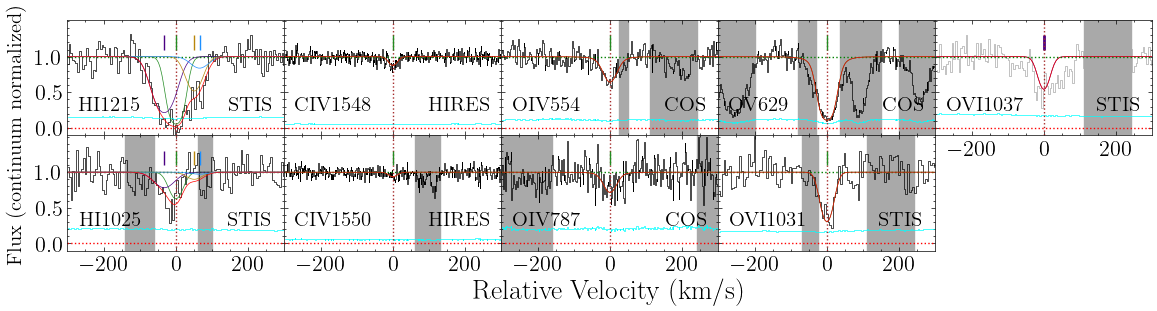

In [221]:
fig, axes = plt.subplots(2, 5, figsize=(5*2.8, 2*1.5), sharex=True, sharey=True)

summary.plot_samples(fig=fig, axes=axes, n_cols=5, label_axes=False)

#ovi_1037_stis.plot_ion_transition_spec(fig=fig, ax=axes[0,4], draw_cont_bounds=False, label_axes=False)
ovi_1037_stis.plot_ion_transition_init_fit(fig, axes[0,4], legend=False, label_axes=False, flux_color='darkgray')

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

axes[1,4].axis('off')
axes[0,4].xaxis.set_tick_params(which='both', labelbottom=True)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative Velocity (km/s)', labelpad=20, fontsize=20)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=30, fontsize=15)


plt.savefig(rootdir+'Ions/z={}/z={}_vp_alt.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

In [222]:
summary.print_summary()

HI1215
dv_c = -0.0 \pm 0.7, logN = 14.00 \pm 0.08, b = 25.1_{-4.3}^{+4.5}
dv_c = -32.2 \pm 5.1, logN = 13.89 \pm 0.08, b = 38.1_{-4.7}^{+5.6}
dv_c = 50.5_{-9.8}^{+6.1}, logN = 13.41 \pm 0.12, b = 29.2_{-4.0}^{+4.8}
dv_c = 65.4_{-8.8}^{+13.3}, logN = 12.89_{-0.51}^{+0.30}, b = 33.2_{-4.8}^{+5.4}
HI1025
dv_c = -0.0 \pm 0.7, logN = 14.00 \pm 0.08, b = 25.1_{-4.3}^{+4.5}
dv_c = -32.2 \pm 5.1, logN = 13.89 \pm 0.08, b = 38.1_{-4.7}^{+5.6}
dv_c = 50.5_{-9.8}^{+6.1}, logN = 13.41 \pm 0.12, b = 29.2_{-4.0}^{+4.8}
dv_c = 65.4_{-8.8}^{+13.3}, logN = 12.89_{-0.51}^{+0.30}, b = 33.2_{-4.8}^{+5.4}
CIV1548
dv_c = -0.0 \pm 0.7, logN = 12.70 \pm 0.06, b = 16.2_{-2.9}^{+3.5}
CIV1550
dv_c = -0.0 \pm 0.7, logN = 12.70 \pm 0.06, b = 16.2_{-2.9}^{+3.5}
OIV554
dv_c = -0.0 \pm 0.7, logN = 13.85 \pm 0.04, b = 21.5 \pm 2.3
OIV787
dv_c = -0.0 \pm 0.7, logN = 13.85 \pm 0.04, b = 21.5 \pm 2.3
OV629
dv_c = -0.0 \pm 0.7, logN = 14.32 \pm 0.10, b = 21.5 \pm 2.3
OVI1031
dv_c = -0.0 \pm 0.7, logN = 14.12 \pm 0.07, b =

# HeI

## HeI 584

In [207]:
hei_584_fuv = ion_transition('HeI', 584, 'He', z_sys, 'COS FUV')

In [208]:
hei_584_fuv.grab_ion_transition_info()

In [209]:
hei_584_fuv.grab_ion_transition_spec(spec_fits_list)

In [210]:
hei_584_fuv.cont_norm_flux(v_abs_range=[-250,250], degree=1)

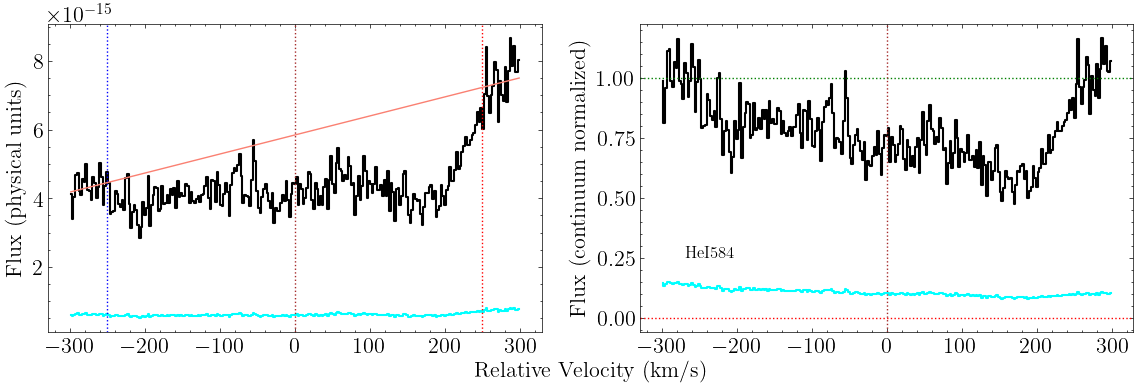

In [211]:
fig, ax = hei_584_fuv.plot_ion_transition_spec_cont()

In [212]:
hei_584_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [213]:
hei_584_fuv.get_upper_lim(20)

logN-1sig: 12.6
logN-2sig: 12.8
logN-3sig: 13.0


In [214]:
hei_584_fuv.get_upper_lim_data(20,0)

logN-1sig: 13.9
logN-2sig: 13.9
logN-3sig: 13.9


## HeI 537

In [215]:
hei_537_fuv = ion_transition('HeI', 537, 'He', z_sys, 'COS FUV')

In [216]:
hei_537_fuv.grab_ion_transition_info()

In [217]:
hei_537_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-200,-40]])

In [218]:
hei_537_fuv.cont_norm_flux(v_abs_range=[-40,50], degree=1)

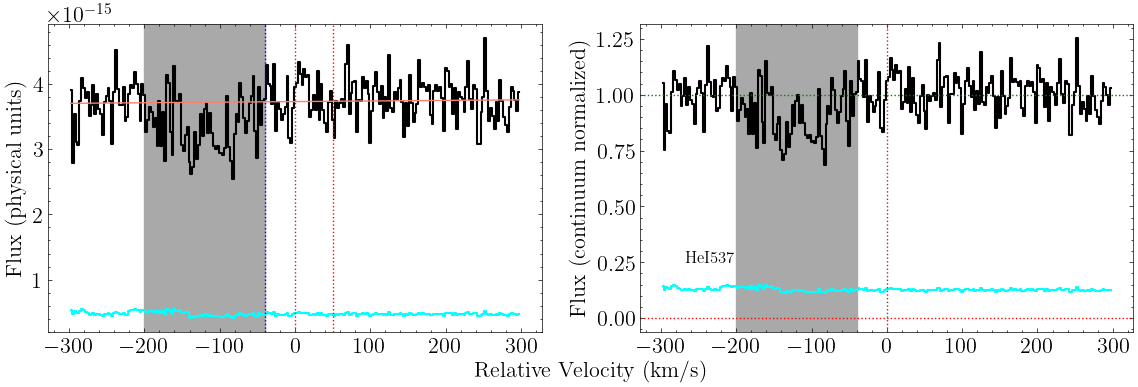

In [219]:
fig, ax = hei_537_fuv.plot_ion_transition_spec_cont()

In [220]:
hei_537_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [221]:
hei_537_fuv.get_upper_lim(20)

logN-1sig: 13.3
logN-2sig: 13.6
logN-3sig: 13.7


# CII

## CII 903.9 (NUV)

In [245]:
cii_904_nuv = ion_transition('CII', 903.9, 'C', z_sys, 'COS NUV')

In [246]:
cii_904_nuv.grab_ion_transition_info()

In [247]:
cii_904_nuv.grab_ion_transition_spec(spec_fits_list)

In [248]:
cii_904_nuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

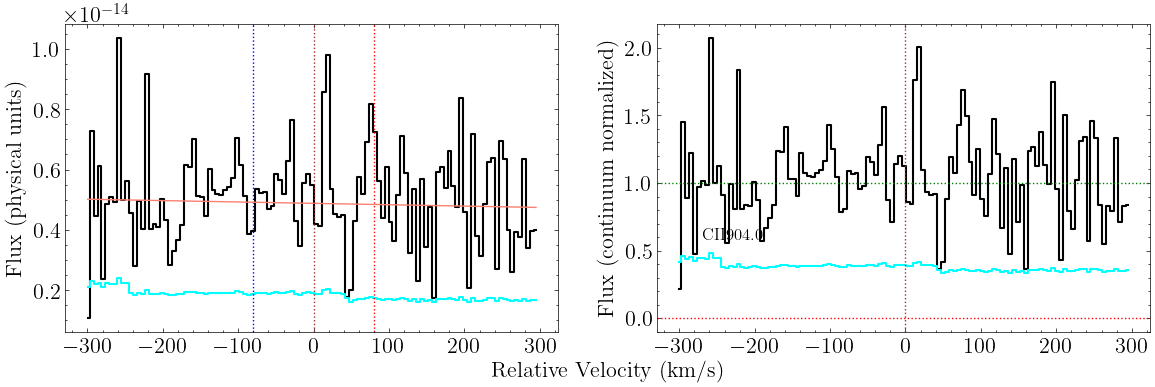

In [249]:
fig, ax = cii_904_nuv.plot_ion_transition_spec_cont()

In [250]:
cii_904_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [251]:
cii_904_nuv.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.5
logN-3sig: 13.7


## CII 903.6 (NUV)

In [252]:
cii_903_nuv = ion_transition('CII', 903.6, 'C', z_sys, 'COS NUV')

In [253]:
cii_903_nuv.grab_ion_transition_info()

In [254]:
cii_903_nuv.grab_ion_transition_spec(spec_fits_list)

In [255]:
cii_903_nuv.cont_norm_flux(v_abs_range=[-60,80], degree=1)

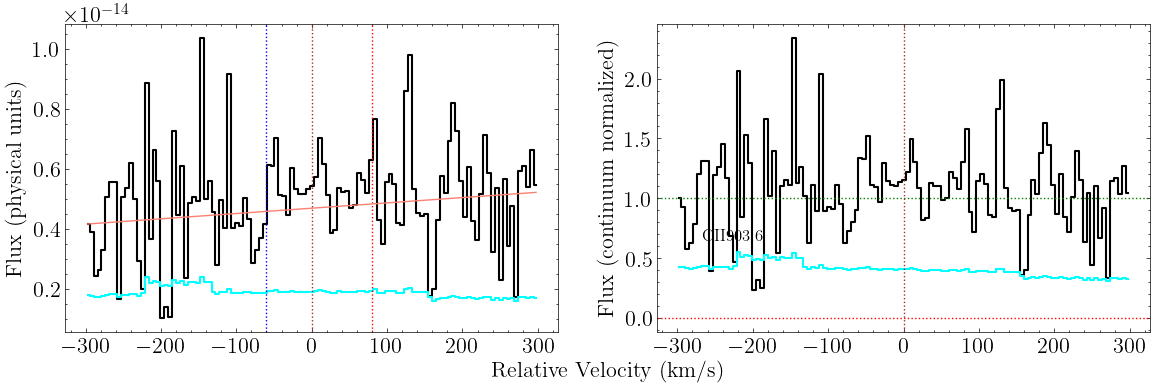

In [256]:
fig, ax = cii_903_nuv.plot_ion_transition_spec_cont()

In [257]:
cii_903_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [258]:
cii_903_nuv.get_upper_lim(20)

logN-1sig: 13.5
logN-2sig: 13.8
logN-3sig: 14.0


## CII 1036 (STIS)

In [259]:
cii_1036_stis = ion_transition('CII', 1036, 'C', z_sys, 'STIS')

In [260]:
cii_1036_stis.grab_ion_transition_info()

In [261]:
cii_1036_stis.grab_ion_transition_spec(spec_fits_list)

In [262]:
cii_1036_stis.cont_norm_flux(v_abs_range=[-80,100], degree=1)

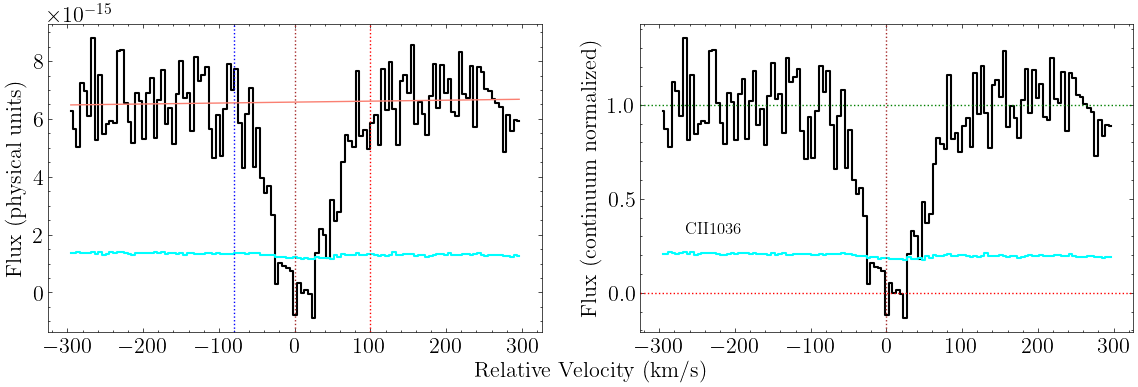

In [263]:
fig, ax = cii_1036_stis.plot_ion_transition_spec_cont()

In [264]:
cii_1036_stis.grab_ion_transition_lsf(lsf_fits_list)

In [265]:
cii_1036_stis.get_upper_lim(20)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


In [266]:
cii_1036_stis.get_upper_lim_data(20,0, logN_max=20)

logN-1sig: 16.4
logN-2sig: 16.6
logN-3sig: 16.9


# CIII

## CIII 977

In [267]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [268]:
ciii_977_stis.grab_ion_transition_info()

In [269]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-200,-90]])

In [270]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-50,100], degree=1)

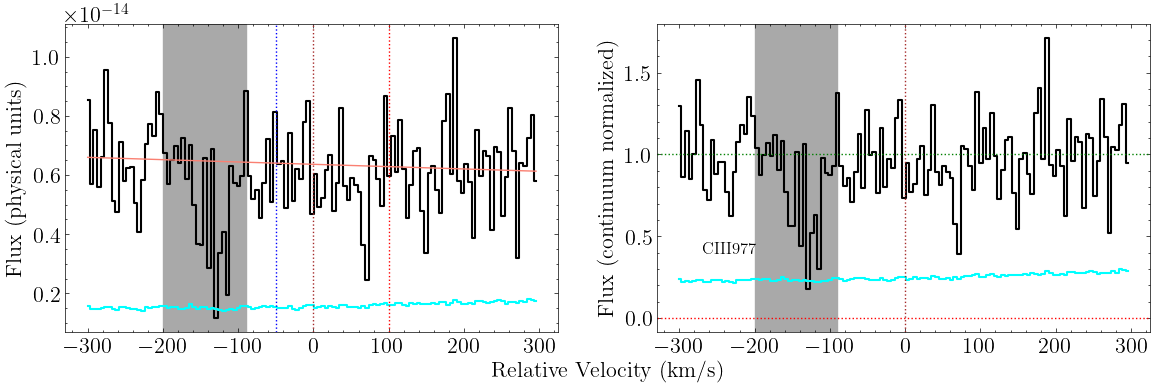

In [271]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [272]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [273]:
ciii_977_stis.get_upper_lim(20)

logN-1sig: 12.4
logN-2sig: 12.7
logN-3sig: 12.9


# NII

## NII 1083 (STIS)

In [274]:
nii_1083_stis = ion_transition('NII', 1083, 'N', z_sys, 'STIS')

In [275]:
nii_1083_stis.grab_ion_transition_info()

In [276]:
nii_1083_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-140]])

In [277]:
nii_1083_stis.cont_norm_flux(v_abs_range=[-80,50], degree=1)

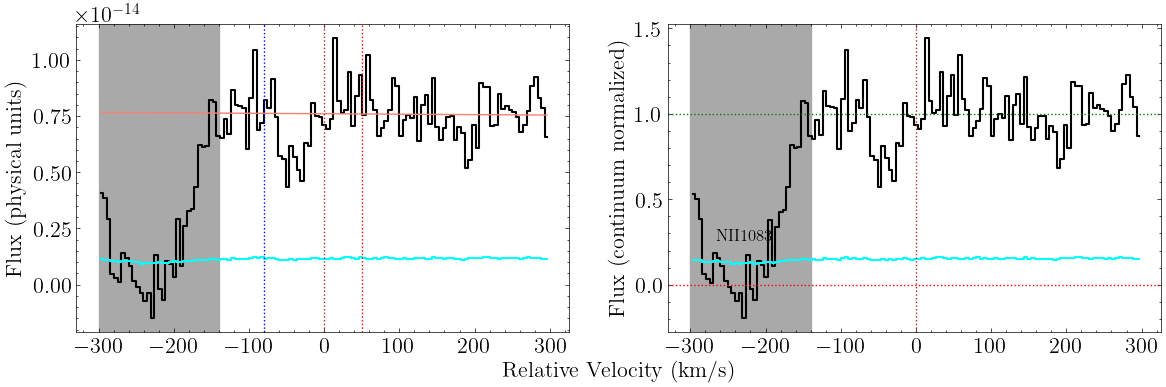

In [278]:
fig, ax = nii_1083_stis.plot_ion_transition_spec_cont()

In [279]:
nii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [280]:
nii_1083_stis.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [282]:
nii_1083_stis.get_upper_lim_data(20,0)

logN-1sig: 13.0
logN-2sig: 13.3
logN-3sig: 13.4


# NIII

## NIII 989 (STIS)

In [283]:
niii_989_stis = ion_transition('NIII', 989, 'N', z_sys, 'STIS')

In [284]:
niii_989_stis.grab_ion_transition_info()

In [285]:
niii_989_stis.grab_ion_transition_spec(spec_fits_list)

In [286]:
niii_989_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

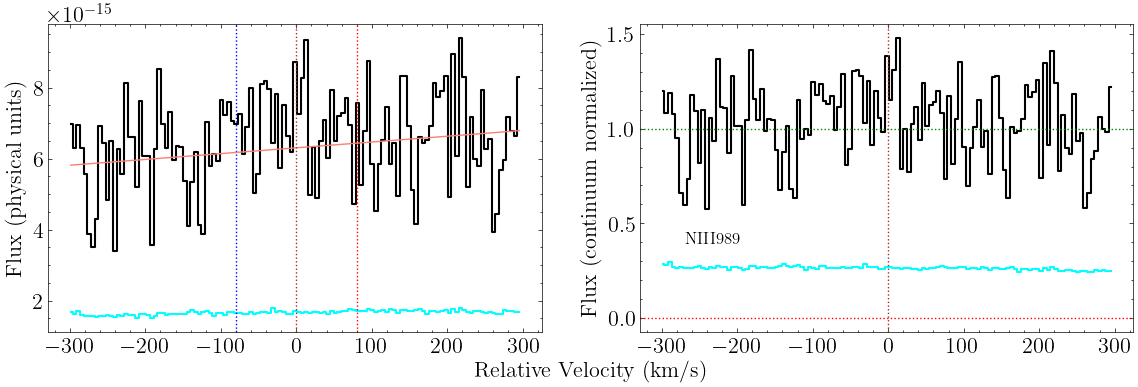

In [287]:
fig, ax = niii_989_stis.plot_ion_transition_spec_cont()

In [288]:
niii_989_stis.grab_ion_transition_lsf(lsf_fits_list)

In [289]:
niii_989_stis.get_upper_lim(20)

logN-1sig: 13.3
logN-2sig: 13.5
logN-3sig: 13.7


In [290]:
niii_989_stis.get_upper_lim_data(20,0)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.5


## NIII 685 (FUV)

In [291]:
niii_685_fuv = ion_transition('NIII', 686, 'N', z_sys, 'COS FUV')

In [292]:
niii_685_fuv.grab_ion_transition_info()

In [293]:
niii_685_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[60,300]])

In [294]:
niii_685_fuv.cont_norm_flux(v_abs_range=[-30,30], degree=1)

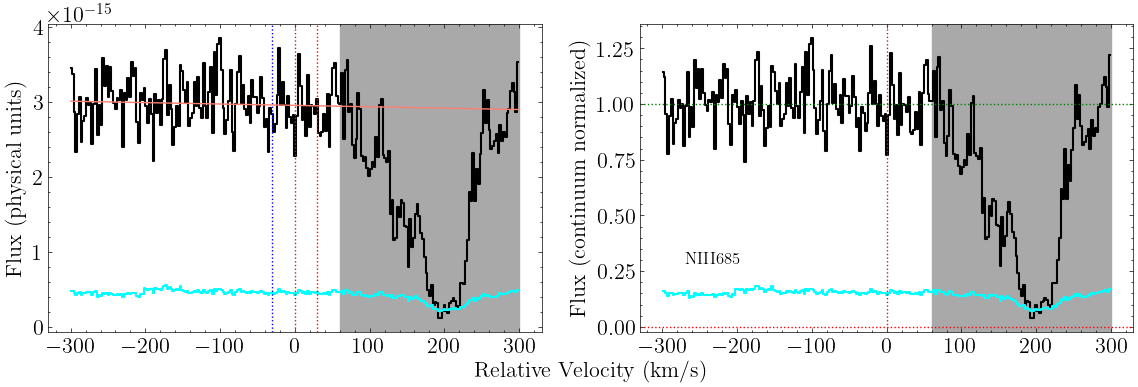

In [295]:
fig, ax = niii_685_fuv.plot_ion_transition_spec_cont()

In [296]:
niii_685_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [297]:
niii_685_fuv.get_upper_lim(20)

logN-1sig: 12.7
logN-2sig: 13.0
logN-3sig: 13.1


In [298]:
niii_685_fuv.get_upper_lim_data(20,0)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.2


## NIII 684 (FUV)

In [299]:
niii_684_fuv = ion_transition('NIII', 684, 'N', z_sys, 'COS FUV')

In [300]:
niii_684_fuv.grab_ion_transition_info()

In [301]:
niii_684_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-80]])

In [302]:
niii_684_fuv.cont_norm_flux(v_abs_range=[-30,30], degree=1)

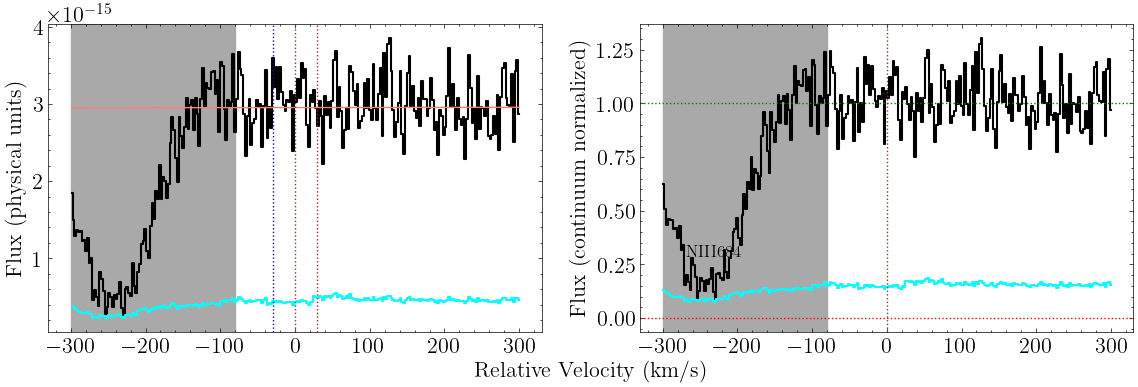

In [303]:
fig, ax = niii_684_fuv.plot_ion_transition_spec_cont()

In [304]:
niii_684_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [305]:
niii_684_fuv.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


# NIV

## NIV 765
Get NIV 765 from COS FUV

In [306]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'COS FUV')

In [307]:
niv_765_fuv.grab_ion_transition_info()

In [308]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[30,80]])

In [309]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-40,170], degree=1)

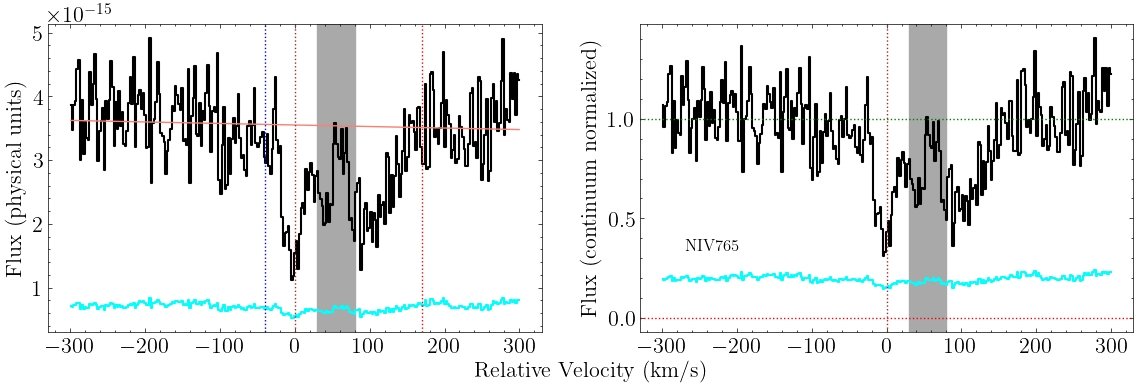

In [310]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [311]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [312]:
niv_765_fuv.get_upper_lim(20)

logN-1sig: 12.3
logN-2sig: 12.6
logN-3sig: 12.7


In [322]:
niv_765_fuv.get_upper_lim_data(20,0,logN_max=25)

logN-1sig: 13.5
logN-2sig: 13.6
logN-3sig: 13.6


# NV

## NV 1242 (STIS)

In [323]:
nv_1242_stis = ion_transition('NV', 1242, 'N', z_sys, 'STIS')

In [324]:
nv_1242_stis.grab_ion_transition_info()

In [325]:
nv_1242_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-220],[100,300]])

In [326]:
nv_1242_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

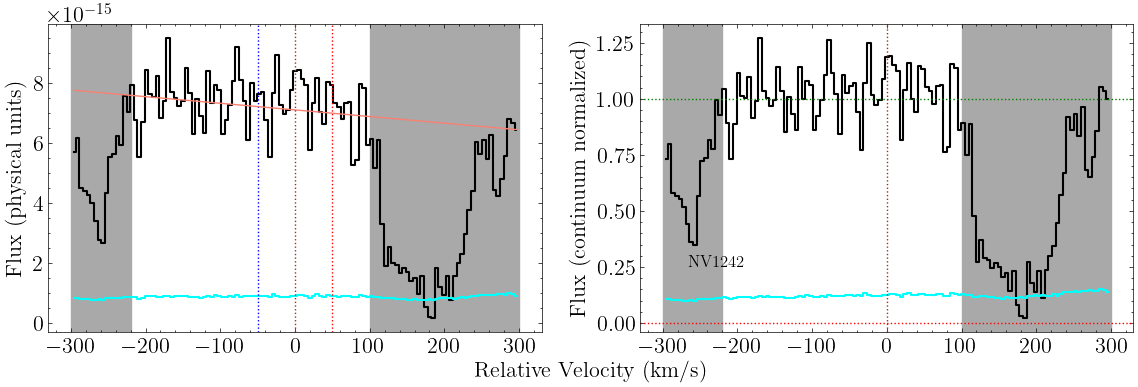

In [327]:
fig, ax = nv_1242_stis.plot_ion_transition_spec_cont()

In [328]:
nv_1242_stis.grab_ion_transition_lsf(lsf_fits_list)

In [329]:
nv_1242_stis.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [330]:
nv_1242_stis.get_upper_lim_data(20, 0)

logN-1sig: 12.7
logN-2sig: 13.0
logN-3sig: 13.2


# OII

## OII 834 (NUV)

In [331]:
oii_834_nuv = ion_transition('OII', 834, 'O', z_sys, 'COS NUV')

In [332]:
oii_834_nuv.grab_ion_transition_info()

In [333]:
oii_834_nuv.grab_ion_transition_spec(spec_fits_list)

In [334]:
oii_834_nuv.cont_norm_flux(renorm=True, v_abs_range=[-100,100], degree=1)

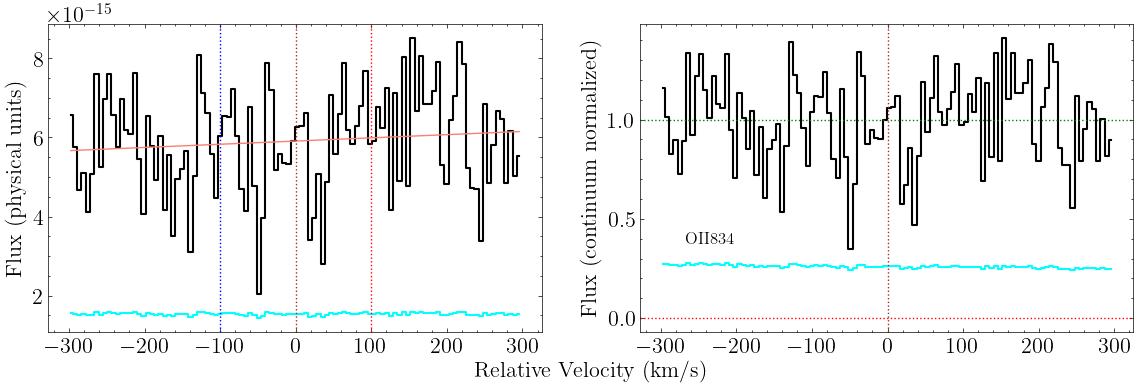

In [335]:
fig, axes = oii_834_nuv.plot_ion_transition_spec_cont()

In [336]:
oii_834_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [337]:
oii_834_nuv.get_upper_lim(20)

logN-1sig: 13.5
logN-2sig: 13.7
logN-3sig: 13.9


# OIII

## OIII 702

In [338]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys, 'COS FUV')

In [339]:
oiii_702_fuv.grab_ion_transition_info()

In [340]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-280,-100],[200,300]])

In [341]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-50,65], degree=1)

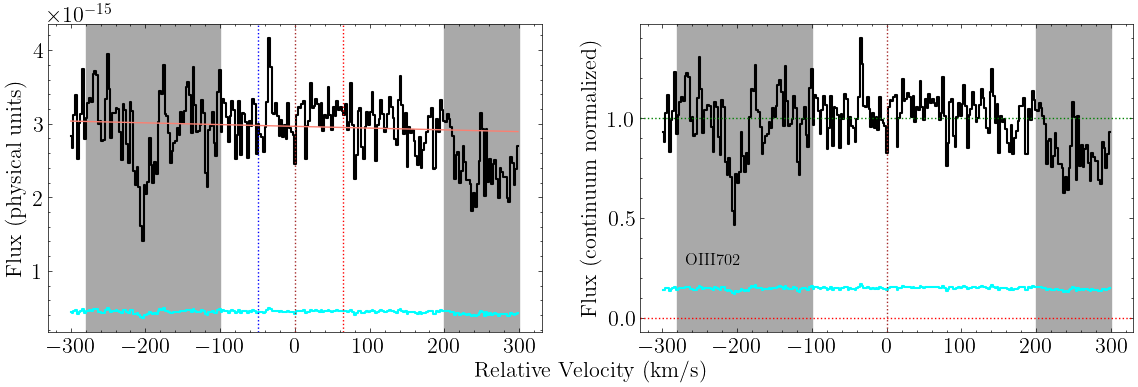

In [342]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

In [343]:
oiii_702_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [345]:
oiii_702_fuv.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [346]:
oiii_702_fuv.get_upper_lim_data(20,0)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


# NeV

## NeV 568 

In [347]:
nev_568_fuv = ion_transition('NeV', 568, 'Ne', z_sys, 'COS FUV')

In [348]:
nev_568_fuv.grab_ion_transition_info()

In [349]:
nev_568_fuv.grab_ion_transition_spec(spec_fits_list)

In [350]:
nev_568_fuv.cont_norm_flux(v_abs_range=[-200,200], degree=1)

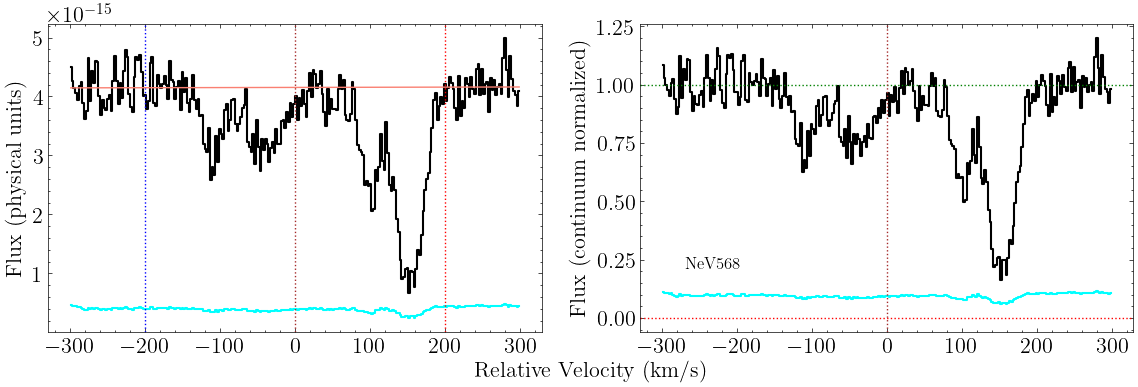

In [351]:
fig, ax = nev_568_fuv.plot_ion_transition_spec_cont()

In [355]:
nev_568_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [358]:
nev_568_fuv.init_ion_transition(init_values = np.array([[13.8, 20, 0]]), 
                             lsf_convolve = True)

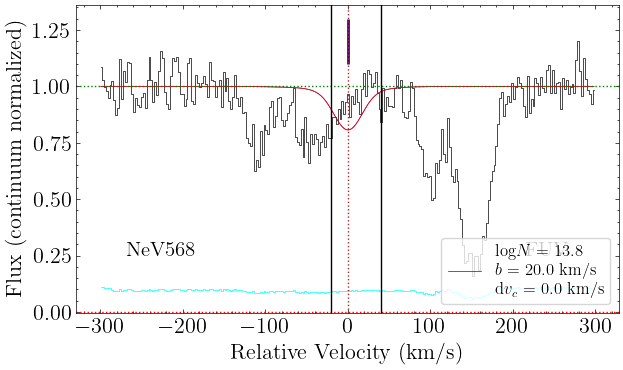

In [366]:
fig, ax = nev_568_fuv.plot_ion_transition_init_fit()
ax.axvline(-20)
ax.axvline(40)

In [367]:
nev_568_fuv.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [368]:
nev_568_fuv.get_upper_lim_data(20,0, v_min=-20, v_max=40)

logN-1sig: 13.5
logN-2sig: 13.6
logN-3sig: 13.7


# NeVI

## NeVI 558 
Get NeVI 558 from COS FUV

In [369]:
nevi_558_fuv = ion_transition('NeVI', 558, 'Ne', z_sys, 'COS FUV')

In [370]:
nevi_558_fuv.grab_ion_transition_info()

In [371]:
nevi_558_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-200,10],[100,300]])

In [372]:
nevi_558_fuv.cont_norm_flux(v_abs_range=[-200,80], degree=1)

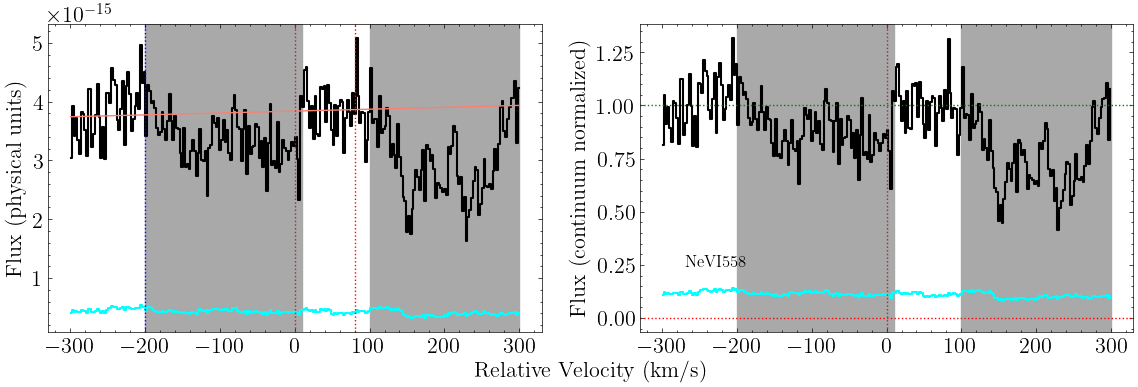

In [373]:
fig, ax = nevi_558_fuv.plot_ion_transition_spec_cont()

In [381]:
nevi_558_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [382]:
nevi_558_fuv.init_ion_transition(init_values = np.array([[13.5, 20, 0]]), 
                             lsf_convolve = True)

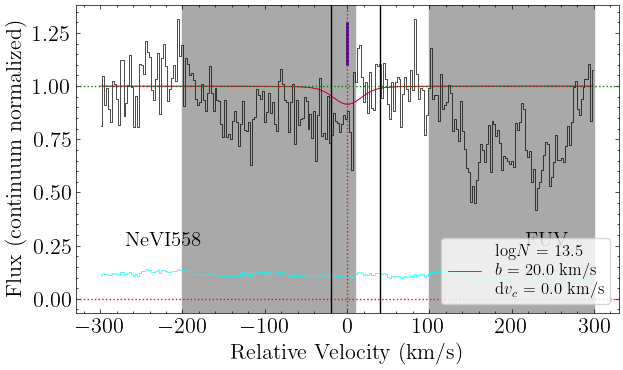

In [383]:
fig, ax = nevi_558_fuv.plot_ion_transition_init_fit()
ax.axvline(-20)
ax.axvline(40)

In [384]:
nevi_558_fuv.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.5


In [397]:
nevi_558_fuv.get_upper_lim_data(20,0,-20,40, logN_max=20)

logN-1sig: 13.8
logN-2sig: 13.9
logN-3sig: 14.0


# NeVIII

## NeVIII 770 (FUV)

In [387]:
neviii_770_fuv = ion_transition('NeVIII', 770, 'Ne', z_sys, 'COS FUV')

In [388]:
neviii_770_fuv.grab_ion_transition_info()

In [389]:
neviii_770_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200]])

In [390]:
neviii_770_fuv.cont_norm_flux(v_abs_range=[-80,120], degree=1)

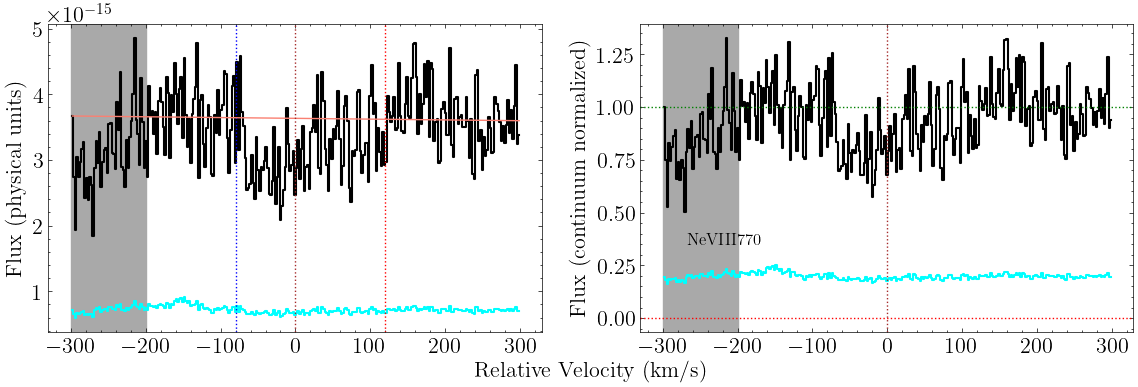

In [391]:
fig, ax = neviii_770_fuv.plot_ion_transition_spec_cont()

In [398]:
neviii_770_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [399]:
neviii_770_fuv.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.5


In [400]:
neviii_770_fuv.get_upper_lim_data(20,0, logN_max=20)

logN-1sig: 13.9
logN-2sig: 14.0
logN-3sig: 14.1


## NeVIII 780 (FUV)

In [401]:
neviii_780_fuv = ion_transition('NeVIII', 780, 'Ne', z_sys, 'COS FUV')

In [402]:
neviii_780_fuv.grab_ion_transition_info()

In [403]:
neviii_780_fuv.grab_ion_transition_spec(spec_fits_list)

In [404]:
neviii_780_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

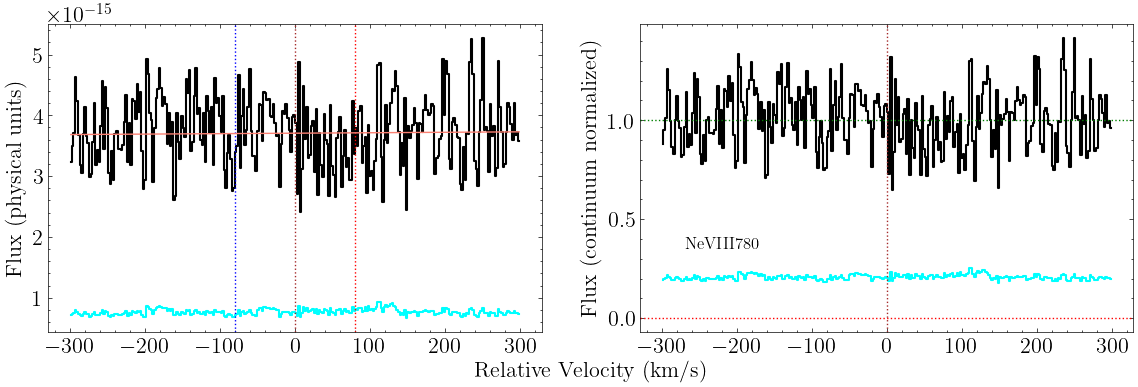

In [405]:
fig, ax = neviii_780_fuv.plot_ion_transition_spec_cont()

In [406]:
neviii_780_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [407]:
neviii_780_fuv.get_upper_lim(20)

logN-1sig: 13.5
logN-2sig: 13.7
logN-3sig: 13.9


In [408]:
neviii_780_fuv.get_upper_lim_data(20,0)

logN-1sig: 13.6
logN-2sig: 13.8
logN-3sig: 13.9


# MgII

## MgII 1240 (STIS)

In [409]:
mgii_1240_stis = ion_transition('MgII', 1240, 'Mg', z_sys, 'STIS')

In [410]:
mgii_1240_stis.grab_ion_transition_info()

In [411]:
mgii_1240_stis.grab_ion_transition_spec(spec_fits_list)

In [412]:
mgii_1240_stis.cont_norm_flux(renorm=True, v_abs_range=[-100,100], degree=1)

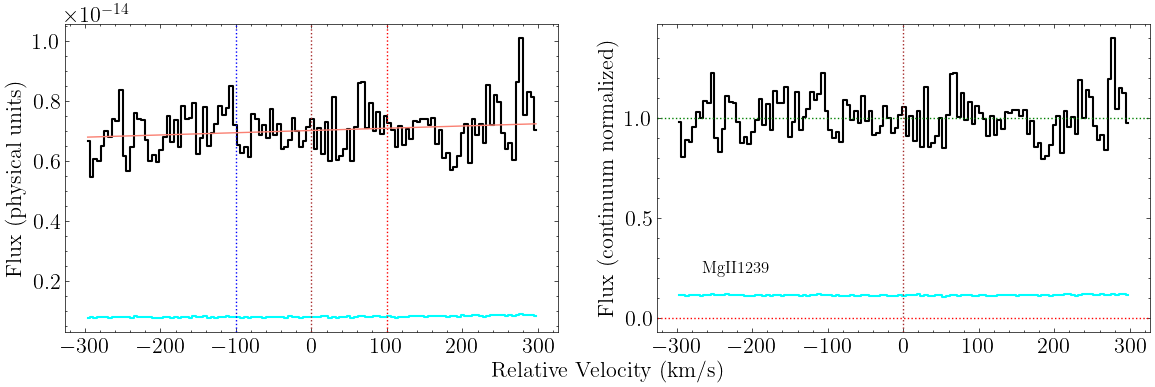

In [413]:
fig, axes = mgii_1240_stis.plot_ion_transition_spec_cont()

In [414]:
mgii_1240_stis.grab_ion_transition_lsf(lsf_fits_list)

In [426]:
mgii_1240_stis.init_ion_transition(init_values = np.array([[15.0, 20, 0]]), 
                             lsf_convolve = True)

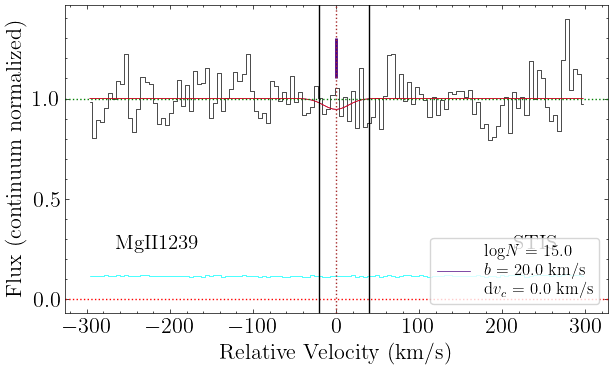

In [427]:
fig, ax = mgii_1240_stis.plot_ion_transition_init_fit()
ax.axvline(-20)
ax.axvline(40)

In [428]:
mgii_1240_stis.get_upper_lim(20, logN_max=20)

logN-1sig: 15.1
logN-2sig: 15.3
logN-3sig: 15.4


In [429]:
mgii_1240_stis.get_upper_lim_data(20, 0, -50, 50, logN_max=20)

logN-1sig: 15.2
logN-2sig: 15.4
logN-3sig: 15.5


# MgX

## MgX 609 (FUV)

In [430]:
mgx_609_fuv = ion_transition('MgX', 609, 'Mg', z_sys, 'COS FUV')

In [431]:
mgx_609_fuv.grab_ion_transition_info()

In [432]:
mgx_609_fuv.grab_ion_transition_spec(spec_fits_list)

In [433]:
mgx_609_fuv.cont_norm_flux(v_abs_range=[-150,150], degree=1)

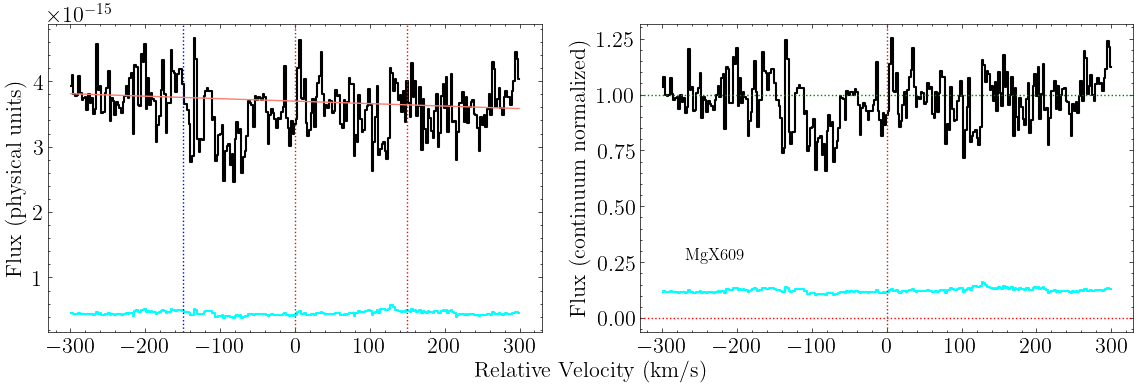

In [434]:
fig, ax = mgx_609_fuv.plot_ion_transition_spec_cont()

In [435]:
mgx_609_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [437]:
mgx_609_fuv.get_upper_lim(20, logN_max=20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.5


## MgX 624 (FUV)

In [438]:
mgx_624_fuv = ion_transition('MgX', 624, 'Mg', z_sys, 'COS FUV')

In [439]:
mgx_624_fuv.grab_ion_transition_info()

In [440]:
mgx_624_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120],[130,220]])

In [441]:
mgx_624_fuv.cont_norm_flux(v_abs_range=[-80,40], degree=1)

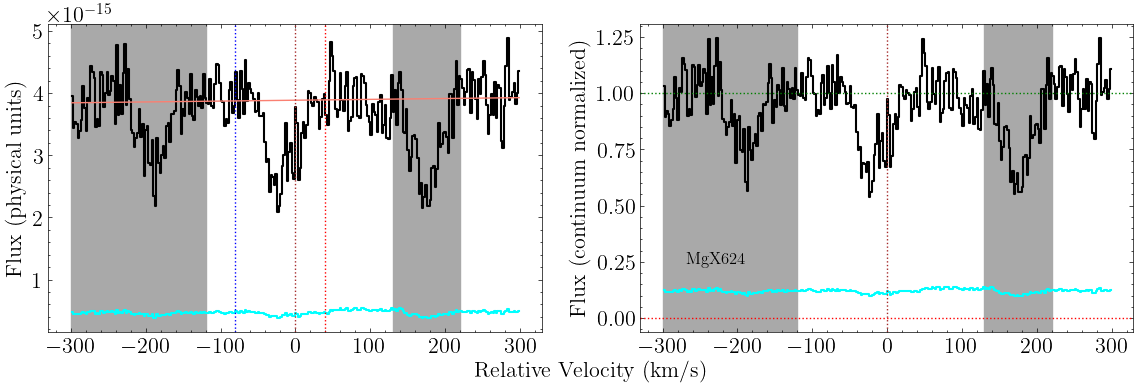

In [442]:
fig, ax = mgx_624_fuv.plot_ion_transition_spec_cont()

In [443]:
mgx_624_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [444]:
mgx_624_fuv.get_upper_lim(20)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.8


# AlII

## AlII 1670 (HIRES)

In [215]:
alii_1670_hires = ion_transition('AlII', 1670, 'Al', z_sys, 'HIRES')

In [216]:
alii_1670_hires.grab_ion_transition_info()

In [217]:
alii_1670_hires.grab_ion_transition_spec(spec_fits_list)

In [218]:
alii_1670_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

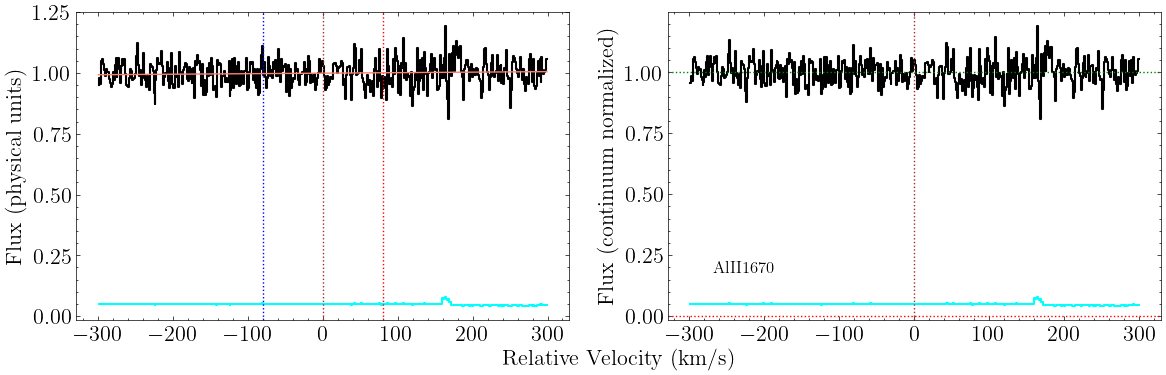

In [219]:
fig, ax = alii_1670_hires.plot_ion_transition_spec_cont()

In [220]:
alii_1670_hires.grab_ion_transition_lsf(lsf_fits_list)

In [221]:
alii_1670_hires.get_upper_lim(20)

logN-1sig: 10.8
logN-2sig: 11.0
logN-3sig: 11.2


# AlIII

## AlIII 1862 (HIRES)

In [222]:
aliii_1862_hires = ion_transition('AlIII', 1862, 'Al', z_sys, 'HIRES')

In [223]:
aliii_1862_hires.grab_ion_transition_info()

In [224]:
aliii_1862_hires.grab_ion_transition_spec(spec_fits_list)

In [225]:
aliii_1862_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

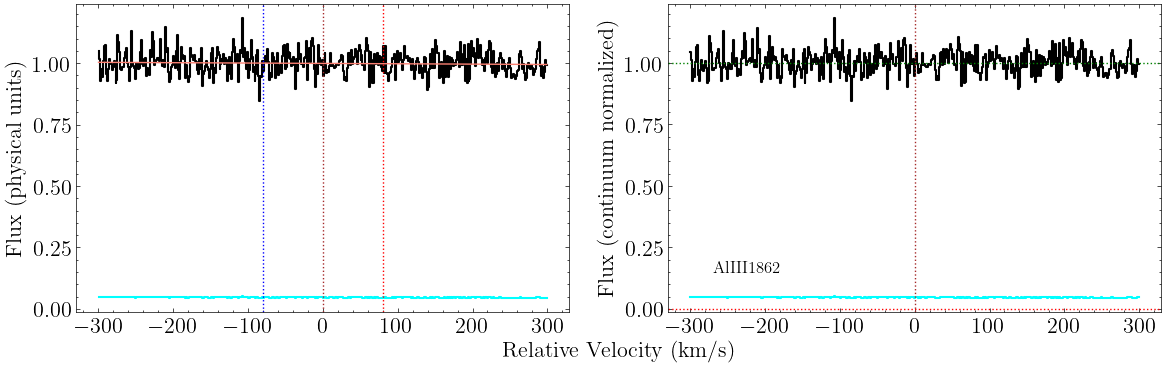

In [226]:
fig, ax = aliii_1862_hires.plot_ion_transition_spec_cont()

In [227]:
aliii_1862_hires.grab_ion_transition_lsf(lsf_fits_list)

In [228]:
aliii_1862_hires.get_upper_lim(20)

logN-1sig: 11.5
logN-2sig: 11.8
logN-3sig: 11.9


## AlIII 1854 (HIRES)

In [229]:
aliii_1854_hires = ion_transition('AlIII', 1854, 'Al', z_sys, 'HIRES')

In [230]:
aliii_1854_hires.grab_ion_transition_info()

In [231]:
aliii_1854_hires.grab_ion_transition_spec(spec_fits_list)

In [232]:
aliii_1854_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

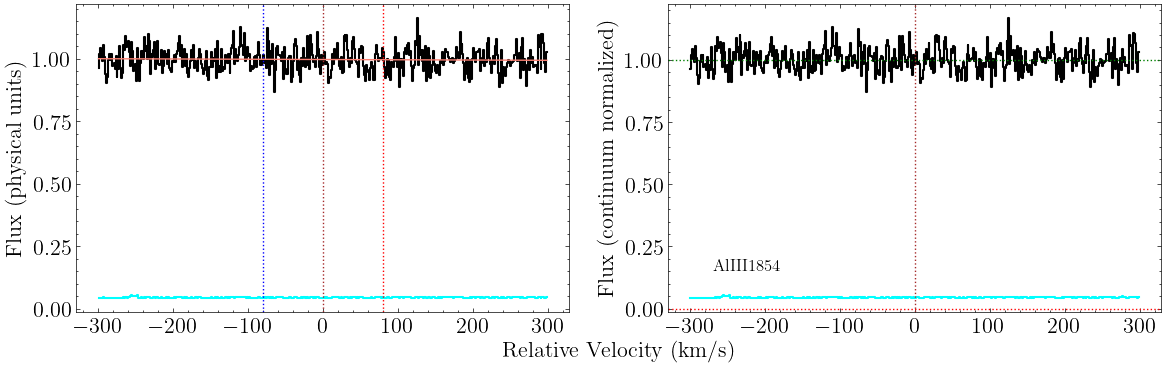

In [233]:
fig, ax = aliii_1854_hires.plot_ion_transition_spec_cont()

In [234]:
aliii_1854_hires.grab_ion_transition_lsf(lsf_fits_list)

In [235]:
aliii_1854_hires.get_upper_lim(20)

logN-1sig: 11.2
logN-2sig: 11.4
logN-3sig: 11.6


# SiII

## SiII 1083 (STIS)

In [477]:
siii_1083_stis = ion_transition('SiII', 1083, 'Si', z_sys, 'STIS')

In [478]:
siii_1083_stis.grab_ion_transition_info()

In [479]:
siii_1083_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170]])

In [480]:
siii_1083_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

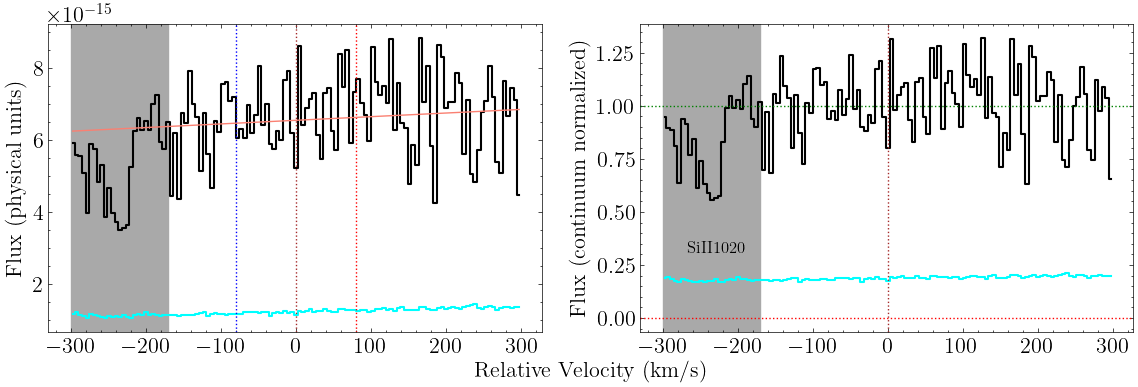

In [481]:
fig, ax = siii_1083_stis.plot_ion_transition_spec_cont()

In [482]:
siii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [483]:
siii_1083_stis.get_upper_lim(20, logN_max=20)

logN-1sig: 14.0
logN-2sig: 14.2
logN-3sig: 14.3


# SiIII

## SiIII 1206 (STIS)

In [484]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [485]:
siiii_1206_stis.grab_ion_transition_info()

In [486]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list)

In [487]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

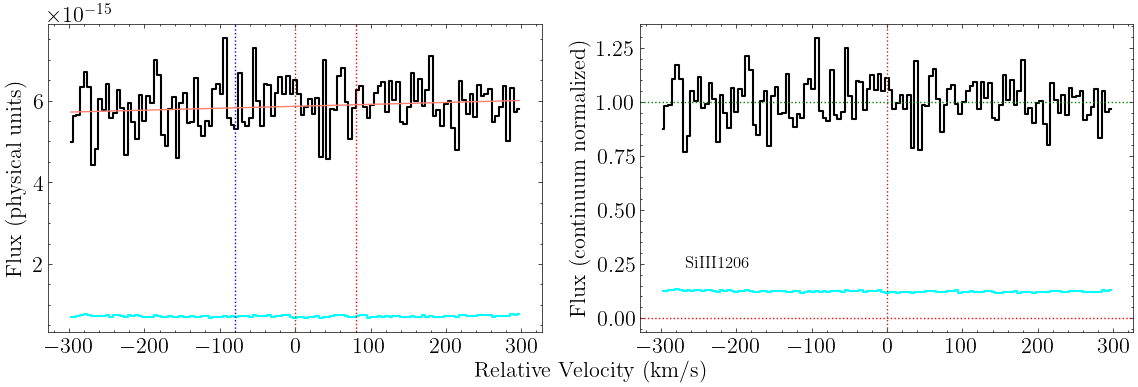

In [488]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [489]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [490]:
siiii_1206_stis.get_upper_lim(20)

logN-1sig: 11.7
logN-2sig: 11.9
logN-3sig: 12.1


# SiIV

## SiIV 1393 (HIRES)

In [236]:
siiv_1393_hires = ion_transition('SiIV', 1393, 'Si', z_sys, 'HIRES')

In [237]:
siiv_1393_hires.grab_ion_transition_info()

In [238]:
siiv_1393_hires.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-280]])

In [239]:
siiv_1393_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

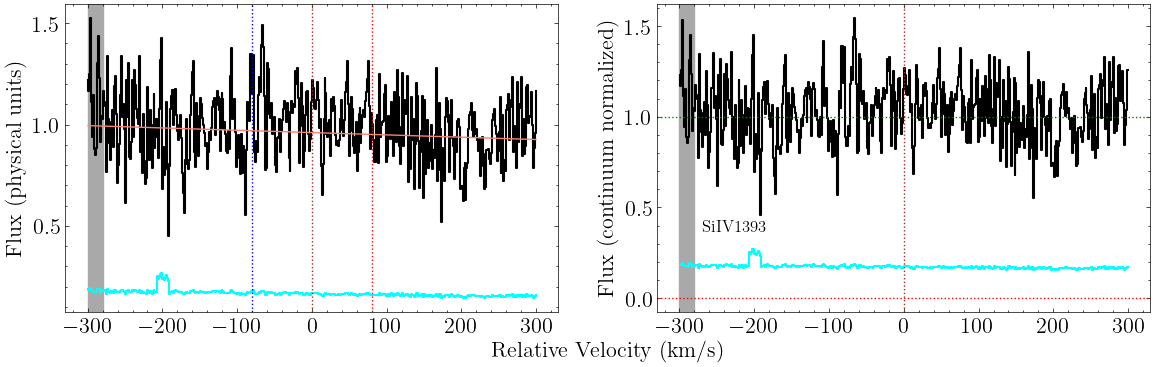

In [240]:
fig, ax = siiv_1393_hires.plot_ion_transition_spec_cont()

In [241]:
siiv_1393_hires.grab_ion_transition_lsf(lsf_fits_list)

In [242]:
siiv_1393_hires.get_upper_lim(20)

logN-1sig: 12.0
logN-2sig: 12.2
logN-3sig: 12.4


## SiIV 1402 (HIRES)

In [243]:
siiv_1402_hires = ion_transition('SiIV', 1402, 'Si', z_sys, 'HIRES')

In [244]:
siiv_1402_hires.grab_ion_transition_info()

In [245]:
siiv_1402_hires.grab_ion_transition_spec(spec_fits_list)

In [246]:
siiv_1402_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

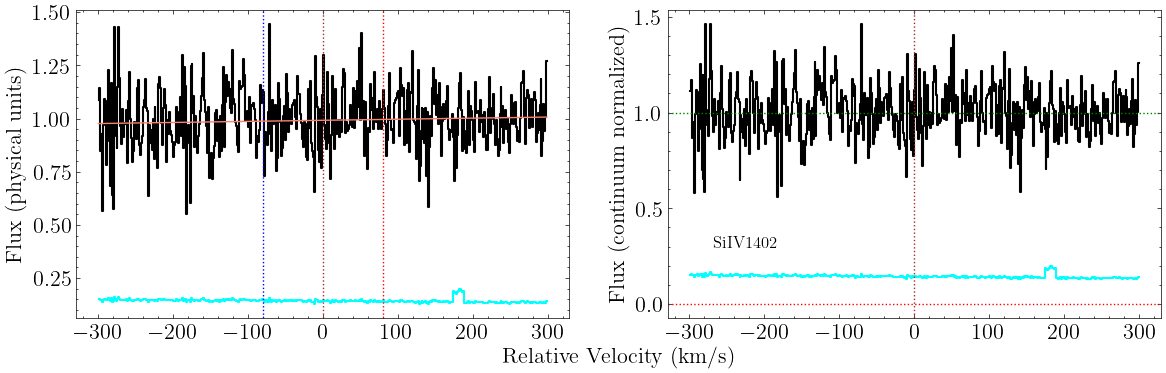

In [247]:
fig, ax = siiv_1402_hires.plot_ion_transition_spec_cont()

In [248]:
siiv_1402_hires.grab_ion_transition_lsf(lsf_fits_list)

In [249]:
siiv_1402_hires.get_upper_lim(20)

logN-1sig: 12.2
logN-2sig: 12.4
logN-3sig: 12.6


# SIV

## SIV 1062 (STIS)

In [505]:
siv_1062_stis = ion_transition('SIV', 1062, 'S', z_sys, 'STIS')

In [506]:
siv_1062_stis.grab_ion_transition_info()

In [507]:
siv_1062_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-250,80]])

In [508]:
siv_1062_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

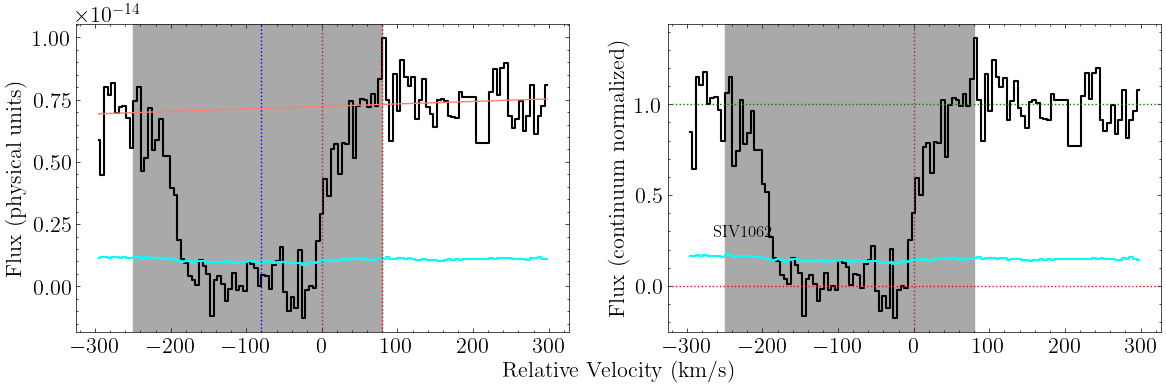

In [509]:
fig, ax = siv_1062_stis.plot_ion_transition_spec_cont()

In [510]:
siv_1062_stis.grab_ion_transition_lsf(lsf_fits_list)

In [511]:
siv_1062_stis.get_upper_lim(20)

logN-1sig: 13.3
logN-2sig: 13.6
logN-3sig: 13.7


## SIV 748

In [512]:
siv_748_fuv = ion_transition('SIV', 748, 'S', z_sys, 'COS FUV')

In [513]:
siv_748_fuv.grab_ion_transition_info()

In [514]:
siv_748_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-250,-120]])

In [515]:
siv_748_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

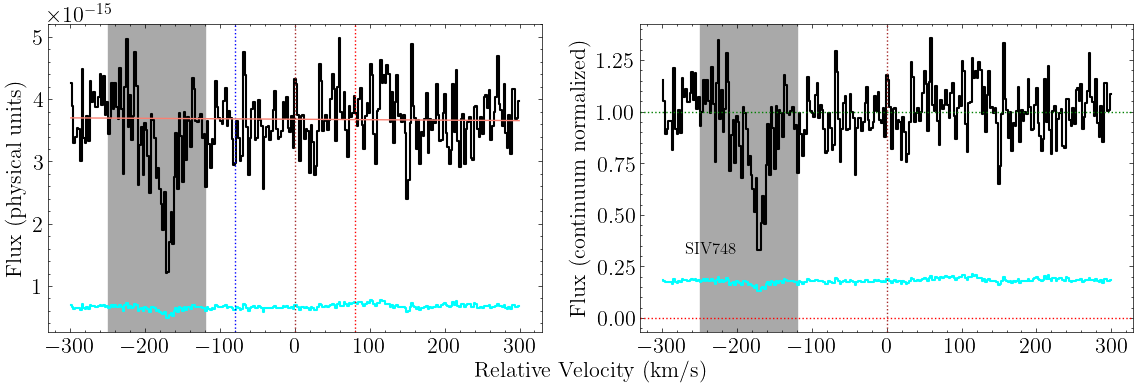

In [516]:
fig, ax = siv_748_fuv.plot_ion_transition_spec_cont()

In [517]:
siv_748_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [518]:
siv_748_fuv.get_upper_lim(20)

logN-1sig: 12.5
logN-2sig: 12.7
logN-3sig: 12.9


In [519]:
siv_748_fuv.get_upper_lim_data(20,0)

logN-1sig: 12.7
logN-2sig: 12.8
logN-3sig: 13.0


# SV

## SV 786

In [520]:
sv_786_fuv = ion_transition('SV', 786, 'S', z_sys, 'COS FUV')

In [521]:
sv_786_fuv.grab_ion_transition_info()

In [522]:
sv_786_fuv.grab_ion_transition_spec(spec_fits_list)

In [523]:
sv_786_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

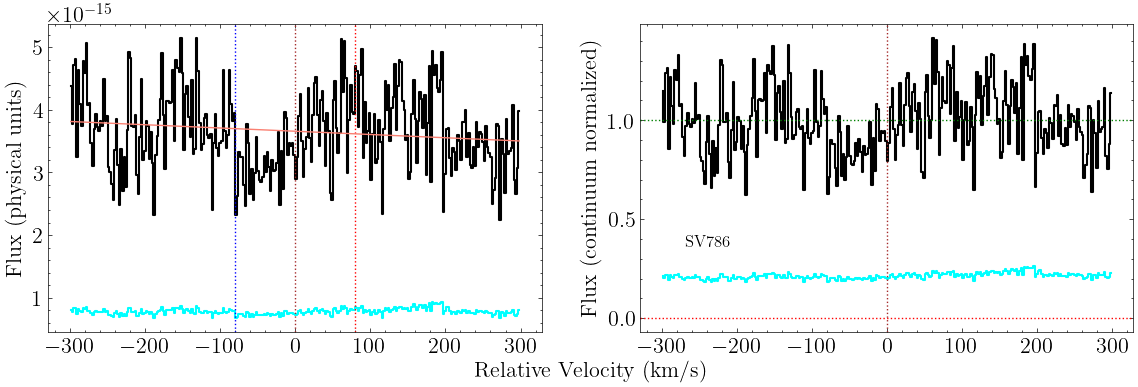

In [524]:
fig, ax = sv_786_fuv.plot_ion_transition_spec_cont()

In [525]:
sv_786_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [526]:
sv_786_fuv.get_upper_lim(20)

logN-1sig: 12.1
logN-2sig: 12.3
logN-3sig: 12.5


In [527]:
sv_786_fuv.get_upper_lim_data(20,0)

logN-1sig: 12.4
logN-2sig: 12.5
logN-3sig: 12.7


# SVI

## SVI 933 (STIS)
Get SVI 933 from COS STIS

In [528]:
svi_933_stis = ion_transition('SVI', 933, 'S', z_sys, 'STIS')

In [529]:
svi_933_stis.grab_ion_transition_info()

In [530]:
svi_933_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200]])

In [531]:
svi_933_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

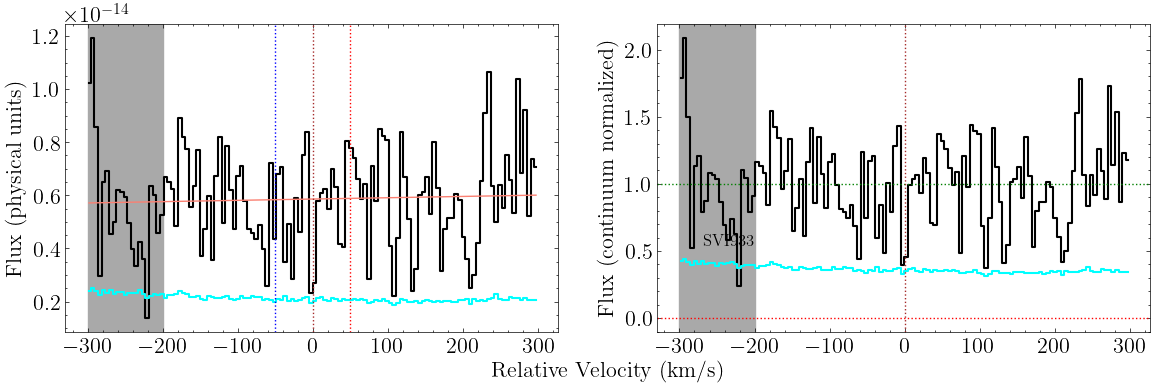

In [532]:
fig, ax = svi_933_stis.plot_ion_transition_spec_cont()

In [533]:
svi_933_stis.grab_ion_transition_lsf(lsf_fits_list)

In [534]:
svi_933_stis.get_upper_lim(20)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


In [541]:
svi_933_stis.get_upper_lim_data(20,0)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


## SVI 944 (STIS)
Get SVI 944 from COS STIS

In [542]:
svi_944_stis = ion_transition('SVI', 944, 'S', z_sys, 'STIS')

In [543]:
svi_944_stis.grab_ion_transition_info()

In [544]:
svi_944_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-150,200]])

In [545]:
svi_944_stis.cont_norm_flux(v_abs_range=[-150,200], degree=1)

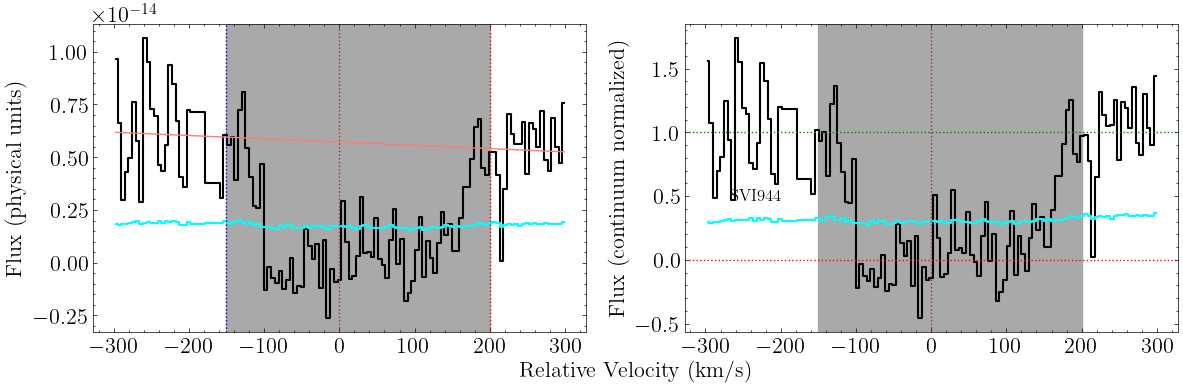

In [546]:
fig, ax = svi_944_stis.plot_ion_transition_spec_cont()

In [547]:
svi_944_stis.grab_ion_transition_lsf(lsf_fits_list)

In [548]:
svi_944_stis.get_upper_lim(20)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


# FeII

## FeII 2600 (HIRES)

In [250]:
feii_2600_hires = ion_transition('FeII', 2600, 'Fe', z_sys, 'HIRES')

In [251]:
feii_2600_hires.grab_ion_transition_info()

In [252]:
feii_2600_hires.grab_ion_transition_spec(spec_fits_list)

In [253]:
feii_2600_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

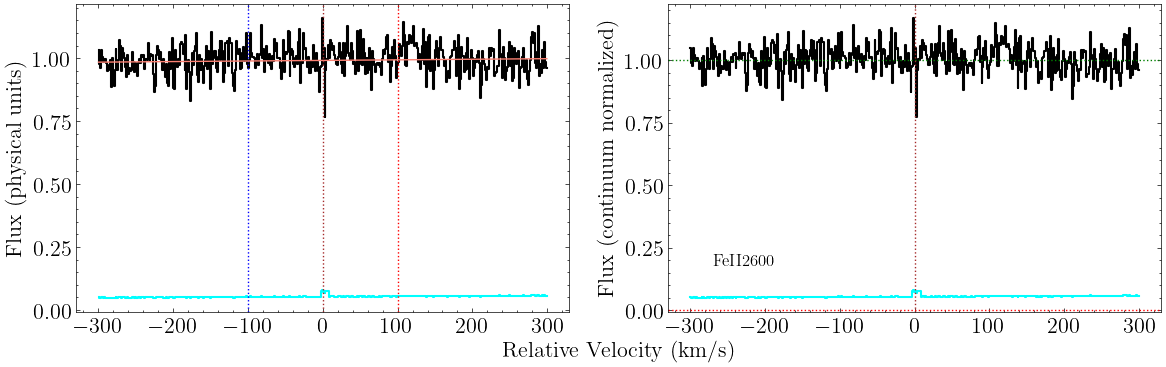

In [254]:
fig, ax = feii_2600_hires.plot_ion_transition_spec_cont()

In [255]:
feii_2600_hires.grab_ion_transition_lsf(lsf_fits_list)

In [256]:
feii_2600_hires.get_upper_lim(20)

logN-1sig: 11.6
logN-2sig: 11.8
logN-3sig: 12.0


## FeII 2382 (HIRES)

In [257]:
feii_2382_hires = ion_transition('FeII', 2382, 'Fe', z_sys, 'HIRES')

In [258]:
feii_2382_hires.grab_ion_transition_info()

In [259]:
feii_2382_hires.grab_ion_transition_spec(spec_fits_list)

In [260]:
feii_2382_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

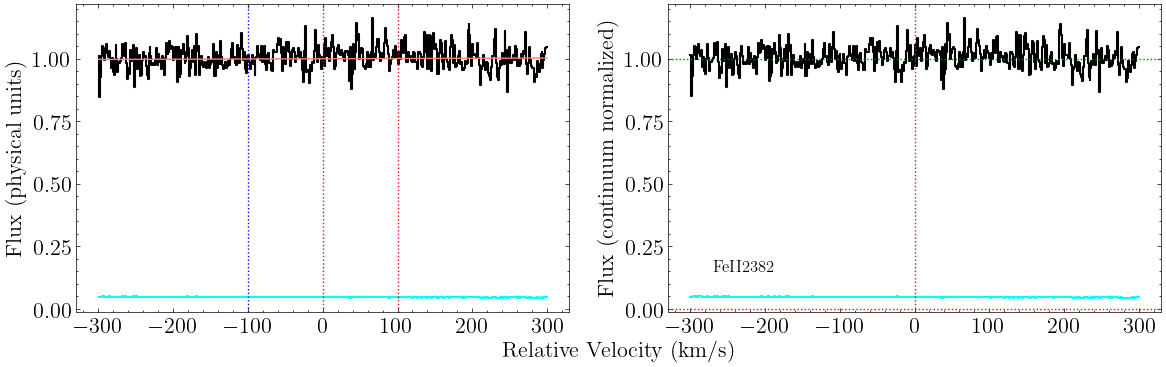

In [261]:
fig, ax = feii_2382_hires.plot_ion_transition_spec_cont()

In [262]:
feii_2382_hires.grab_ion_transition_lsf(lsf_fits_list)

In [263]:
feii_2382_hires.get_upper_lim(20)

logN-1sig: 11.4
logN-2sig: 11.6
logN-3sig: 11.8


## FeII 2344 (HIRES)

In [264]:
feii_2344_hires = ion_transition('FeII', 2344, 'Fe', z_sys, 'HIRES')

In [265]:
feii_2344_hires.grab_ion_transition_info()

In [266]:
feii_2344_hires.grab_ion_transition_spec(spec_fits_list)

In [267]:
feii_2344_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

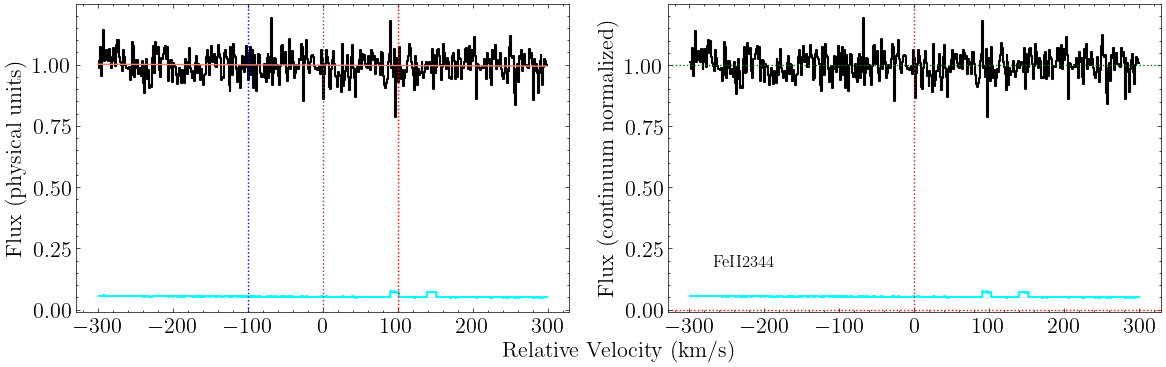

In [268]:
fig, ax = feii_2344_hires.plot_ion_transition_spec_cont()

In [269]:
feii_2344_hires.grab_ion_transition_lsf(lsf_fits_list)

In [270]:
feii_2344_hires.get_upper_lim(20)

logN-1sig: 11.9
logN-2sig: 12.1
logN-3sig: 12.3
